# Part 1 - 
- DOMAIN: Automobile
- CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

### 1. Import and warehouse data:
1. Import and warehouse data: [ Score: 3 points ]
2. Import all the given datasets and explore shape and size.
3. Merge all datasets onto one and explore final shape and size.
4. Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.
5. Import the data from above steps into python.

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.svm import SVC

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import zscore

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

import warnings; warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

In [2]:
df1 = pd.read_csv('Part1 - Car name.csv')

In [4]:
df1.head(5)

car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino

In [5]:
df2 = pd.read_json('Part1 - Car-Attributes.json')

In [6]:
df2.head(5)

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1

In [7]:
print('Shape of Part1 - Car name.csv: ', df1.shape)
print('Shape of Part1 - Car-Attributes.json ', df2.shape)

Shape of Part1 - Car name.csv:  (398, 1)
Shape of Part1 - Car-Attributes.json  (398, 8)


In [8]:
print('Information of Part1 - Car name.csv: \n', df1.info())
print('Information of Part1 - Car-Attributes.json: \n', df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Information of Part1 - Car name.csv: 
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB
Information of Part1 - Car-Attributes.json: 
 None


In [9]:
dataset = pd.merge(df1,df2,left_index=True,right_index=True)

In [10]:
dataset.head()

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1

In [11]:
dataset.shape

(398, 9)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [18]:
# exporting dataset to CSV
dataset.to_csv('final_dataset.csv')

In [19]:
# exporting dataset to excel
dataset.to_excel('final_dataset.xlsx')

In [20]:
# exporting dataset to excel
dataset.to_json('final_dataset.json')

In [15]:
# importing final data which we created, for model creation and analysis.
dataset_final = pd.read_csv('final_dataset.csv')

In [16]:
dataset_final.head()

Unnamed: 0                   car_name   mpg  cyl   disp   hp    wt   acc  \
0           0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0   
1           1          buick skylark 320  15.0    8  350.0  165  3693  11.5   
2           2         plymouth satellite  18.0    8  318.0  150  3436  11.0   
3           3              amc rebel sst  16.0    8  304.0  150  3433  12.0   
4           4                ford torino  17.0    8  302.0  140  3449  10.5   

   yr  origin  
0  70       1  
1  70       1  
2  70       1  
3  70       1  
4  70       1

In [17]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  398 non-null    int64  
 1   car_name    398 non-null    object 
 2   mpg         398 non-null    float64
 3   cyl         398 non-null    int64  
 4   disp        398 non-null    float64
 5   hp          398 non-null    object 
 6   wt          398 non-null    int64  
 7   acc         398 non-null    float64
 8   yr          398 non-null    int64  
 9   origin      398 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [18]:
dataset_final.drop(columns='Unnamed: 0', inplace=True)

In [55]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### 2. Data cleansing: [ Score: 3 points ]
- Missing/incorrect value treatment
- Drop attribute/s if required using relevant functional knowledge
- Perform another kind of corrections/treatment on the data.

In [20]:
dataset_final.tail(10)

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
388  chrysler lebaron medallion  26.0    4  156.0   92  2585  14.5  82       1
389              ford granada l  22.0    6  232.0  112  2835  14.7  82       1
390            toyota celica gt  32.0    4  144.0   96  2665  13.9  82       3
391           dodge charger 2.2  36.0    4  135.0   84  2370  13.0  82       1
392            chevrolet camaro  27.0    4  151.0   90  2950  17.3  82       1
393             ford mustang gl  27.0    4  140.0   86  2790  15.6  82       1
394                   vw pickup  44.0    4   97.0   52  2130  24.6  82       2
395               dodge rampage  32.0    4  135.0   84  2295  11.6  82       1
396                 ford ranger  28.0    4  120.0   79  2625  18.6  82       1
397                  chevy s-10  31.0    4  119.0   82  2720  19.4  82       1

In [23]:
dataset_final.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [24]:
# we can see that for col 'hp', we have unwarranted '?' present.
dataset_final[dataset_final.hp == '?']

car_name   mpg  cyl   disp hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0  ?  2046  19.0  71       1
126         ford maverick  21.0    6  200.0  ?  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0  ?  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0  ?  2905  14.3  80       1
354           renault 18i  34.5    4  100.0  ?  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0  ?  3035  20.5  82       1

In [56]:
# we'll drop these records now from our dataset
dataset_final.hp.max()

'?'

In [65]:
# deleting the records with '?' values from our dataset.
x = dataset_final.hp.max()
dataset_final.drop(dataset_final[dataset_final['hp'] == x].index, inplace=True)

In [66]:
dataset_final.shape

(392, 9)

In [69]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    object 
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [70]:
dataset_final.hp = dataset_final.hp.astype(float)

In [72]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    float64
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [73]:
# removing the car nane from our dataset.
dataset_final.drop(columns='car_name',inplace=True)

In [98]:
dataset_final_1 = dataset_final

In [99]:
dataset_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   disp    392 non-null    float64
 3   hp      392 non-null    float64
 4   wt      392 non-null    int64  
 5   acc     392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


### 3. Data analysis & visualisation: [ Score: 4 points ]
- Perform detailed statistical analysis on the data.
- Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [78]:
dataset_final_1.describe().T

count         mean         std     min       25%      50%       75%  \
mpg     392.0    23.445918    7.805007     9.0    17.000    22.75    29.000   
cyl     392.0     5.471939    1.705783     3.0     4.000     4.00     8.000   
disp    392.0   194.411990  104.644004    68.0   105.000   151.00   275.750   
hp      392.0   104.469388   38.491160    46.0    75.000    93.50   126.000   
wt      392.0  2977.584184  849.402560  1613.0  2225.250  2803.50  3614.750   
acc     392.0    15.541327    2.758864     8.0    13.775    15.50    17.025   
yr      392.0    75.979592    3.683737    70.0    73.000    76.00    79.000   
origin  392.0     1.576531    0.805518     1.0     1.000     1.00     2.000   

           max  
mpg       46.6  
cyl        8.0  
disp     455.0  
hp       230.0  
wt      5140.0  
acc       24.8  
yr        82.0  
origin     3.0

<AxesSubplot:title={'center':'Correlation HeatMap'}>

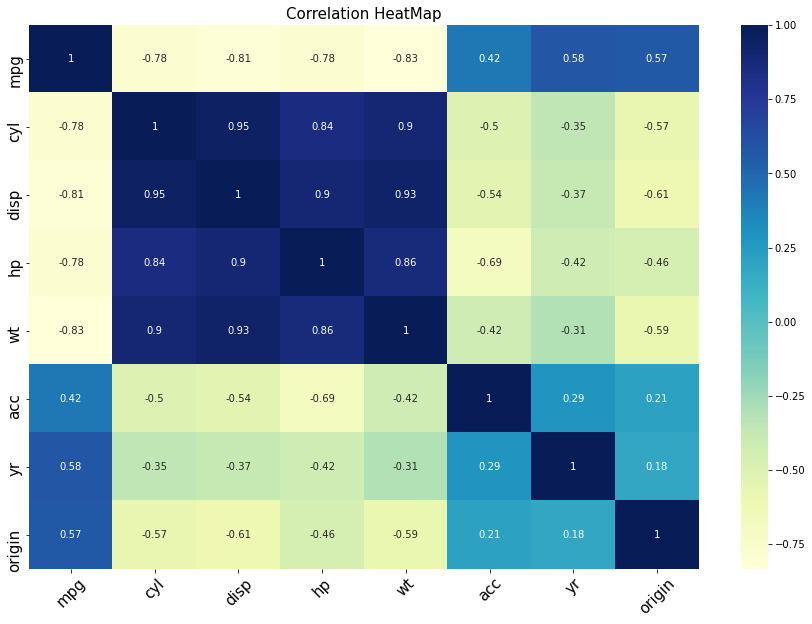

In [76]:
# we'll start with the corr relationship between the colums that we have to understand their relationship:

correlation = dataset_final_1.corr()
plt.figure(figsize = (15, 10))
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.title('Correlation HeatMap', fontsize = 15)
sns.heatmap(correlation, annot = True, cmap = 'YlGnBu')

Observations:
1. We can see high corr. between Cylinder and displacement  = 0.95 (very high)
2. Correlation between Cylinder and hp = 0.84 (high)
3. Correalation between Cyinder and weight = 09. (very high)
4. Very low corelation between Weight and miles per gallon = -0.83 (very low)
5. Low corr between HP and accelation = -0.69

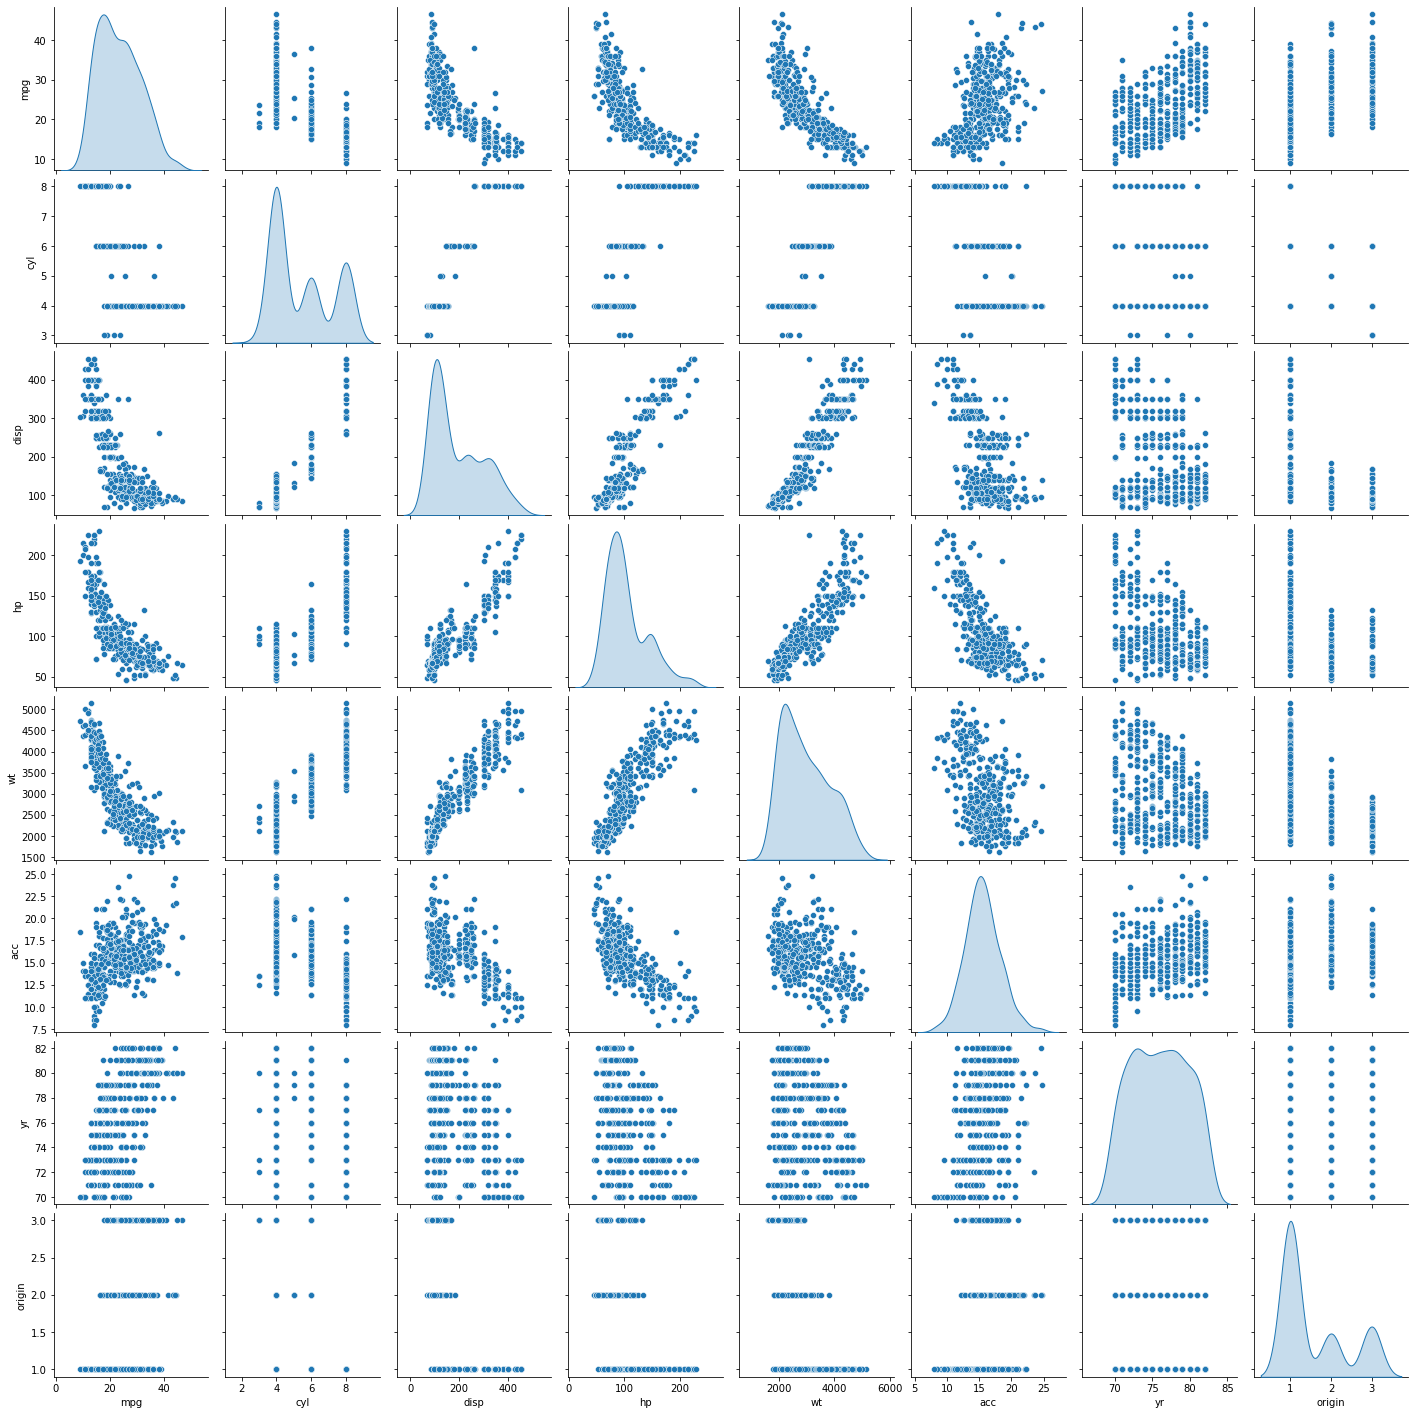

In [83]:
sns.pairplot(dataset_final_1, diag_kind='kde')

- There appears to be a linear relationship between the variables.
- We can see both positive and negative relations between variables that we deduce with corr diagram.

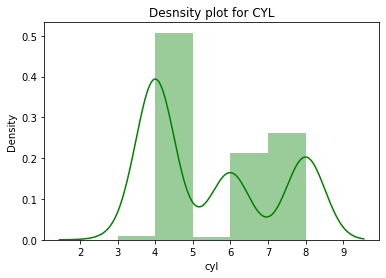

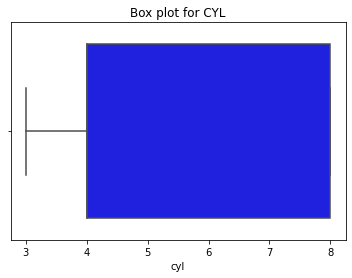

In [106]:
# we'll now start with Uni, Bi and multivariate analysis:

#1. CYL
#plt.figure(figsize = (7, 5))
sns.distplot(dataset_final_1.cyl, color='green').set_title('Desnsity plot for CYL')
plt.show()
sns.boxplot(dataset_final_1.cyl, color='blue').set_title('Box plot for CYL')
plt.show()

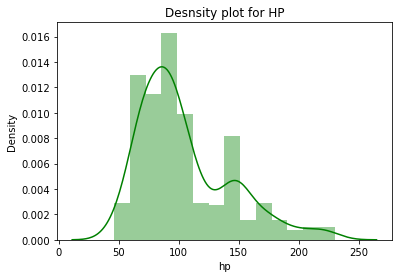

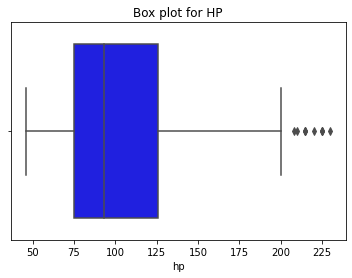

In [107]:
#2. HP

sns.distplot(dataset_final_1.hp, color='green').set_title('Desnsity plot for HP')
plt.show()
sns.boxplot(dataset_final_1.hp, color='blue').set_title('Box plot for HP')
plt.show()

- We have some outliers in the HP columns

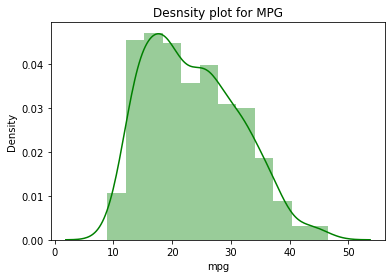

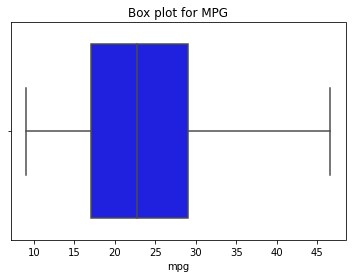

In [109]:
#3. MPG

sns.distplot(dataset_final_1.mpg, color='green').set_title('Desnsity plot for MPG')
plt.show()
sns.boxplot(dataset_final_1.mpg, color='blue').set_title('Box plot for MPG')
plt.show()

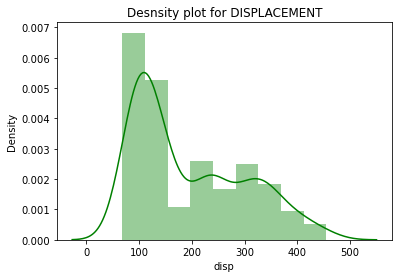

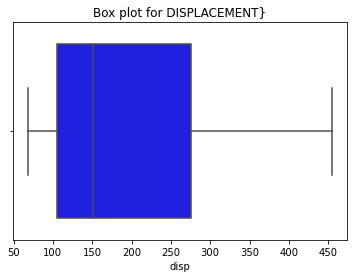

In [110]:
#4. DISP

sns.distplot(dataset_final_1.disp, color='green').set_title('Desnsity plot for DISPLACEMENT')
plt.show()
sns.boxplot(dataset_final_1.disp, color='blue').set_title('Box plot for DISPLACEMENT}')
plt.show()

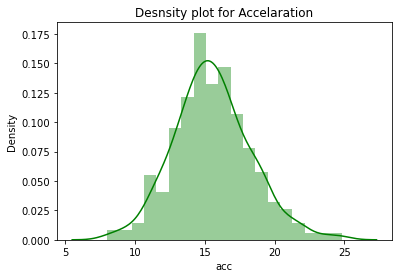

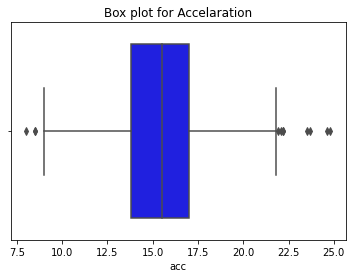

In [111]:
#5. Accelaration

sns.distplot(dataset_final_1.acc, color='green').set_title('Desnsity plot for Accelaration')
plt.show()
sns.boxplot(dataset_final_1.acc, color='blue').set_title('Box plot for Accelaration')
plt.show()

- For Accelaration column as well, we have some outliers present here.

In [112]:
# we'll fix the outliers present for HP and ACC.

#replacing outliers with IQR (Q1 and Q3 +-1.5*IQR)
IQR1 = stats.iqr(dataset_final_1['hp'], interpolation = 'midpoint')
IQR2 = stats.iqr(dataset_final_1['acc'], interpolation = 'midpoint')

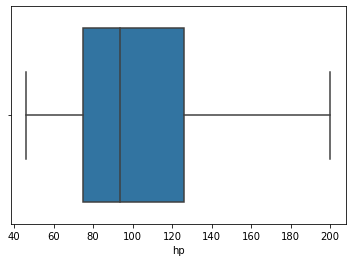

In [116]:
#now, HP and Acc are as:

Q3 = dataset_final_1['hp'].quantile(0.75)
dataset_final_1['hp'] = np.where(dataset_final_1["hp"] >(Q3+1.5*IQR1), 198.5,dataset_final_1['hp'])
sns.boxplot(dataset_final_1['hp']);

13.775000000000002 17.025


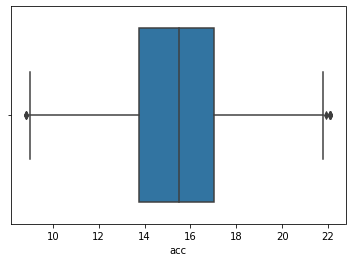

In [120]:
Q1 = dataset_final_1['acc'].quantile(0.25)
Q3 = dataset_final_1['acc'].quantile(0.75)
print(Q1, Q3)

dataset_final_1['acc'] = np.where(dataset_final_1["acc"] >(Q3+1.5*IQR2),22.10,dataset_final_1['acc'])
dataset_final_1['acc'] = np.where(dataset_final_1["acc"] <(Q1-1.5*IQR2),(Q1-1.5*IQR2),dataset_final_1['acc'])
sns.boxplot(dataset_final_1['acc']);

Observations:
- We have completed the Statistical analysis of the given dataset.
- We identified and corrected the records and created final dataset to work upon with ML algorithms.
- We performed EDA and analysed each column and its impact on other columns.
- We also identified the outliers and made corrections where needed.

### 4. Machine learning: [ Score: 8 points ]
- Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data.
- Share your insights about the difference in using these two methods.

In [121]:
# we'll start with K-means clustering technique:

dataset_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   disp    392 non-null    float64
 3   hp      392 non-null    float64
 4   wt      392 non-null    int64  
 5   acc     392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [131]:
# the col origin is the categorical col
data = dataset_final_1.iloc[:,0:7]
data_scaled = data.apply(zscore)
data_scaled.head()

mpg       cyl      disp        hp        wt       acc        yr
0 -0.698638  1.483947  1.077290  0.704168  0.620540 -1.312137 -1.625315
1 -1.083498  1.483947  1.488732  1.650322  0.843334 -1.498326 -1.625315
2 -0.698638  1.483947  1.182542  1.244827  0.540382 -1.684515 -1.625315
3 -0.955212  1.483947  1.048584  1.244827  0.536845 -1.312137 -1.625315
4 -0.826925  1.483947  1.029447  0.974498  0.555706 -1.870705 -1.625315

- we have scaled our data and removed the outliers, hence we are ready for K-means clustering technique.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

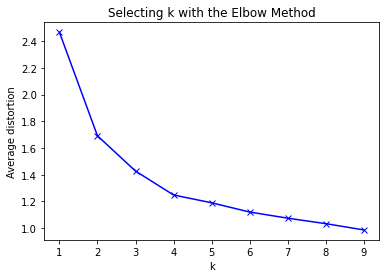

In [132]:
# now, for K-means clustering, we'll try to find the best number for 'K'.

from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_scaled)
    prediction=model.predict(data_scaled)
    meanDistortions.append(sum(np.min(cdist(data_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / 
                           data_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

- We can clearly see here, the elbow of this cure is at '2'. Hence, we'll take k=2 for our model.

In [155]:
final_model=KMeans(2)
final_model.fit(data_scaled)
prediction=final_model.predict(data_scaled)

#Appending the predictions to the dataset 
data["Pred"] = prediction
data_scaled["Pred"] = prediction
print("Groups Assigned : \n")
data.sample(5)

Groups Assigned : 



mpg  cyl   disp     hp    wt   acc  yr  Pred
390  32.0    4  144.0   96.0  2665  13.9  82     1
217  30.0    4  111.0   80.0  2155  14.8  77     1
87   13.0    8  350.0  145.0  3988  13.0  73     0
383  38.0    4   91.0   67.0  1965  15.0  82     1
37   18.0    6  232.0  100.0  3288  15.5  71     1

In [156]:
data.groupby('Pred').count()

mpg  cyl  disp   hp   wt  acc   yr
Pred                                    
0     100  100   100  100  100  100  100
1     292  292   292  292  292  292  292

In [157]:
data_scaled.groupby('Pred').mean().T

Pred         0         1
mpg  -1.120060  0.383582
cyl   1.472207 -0.504181
disp  1.453998 -0.497945
hp    1.475148 -0.505188
wt    1.354828 -0.463982
acc  -1.038159  0.355534
yr   -0.606026  0.207543

- We can clearly see two disting group with a difference in average between the clusters and variables.


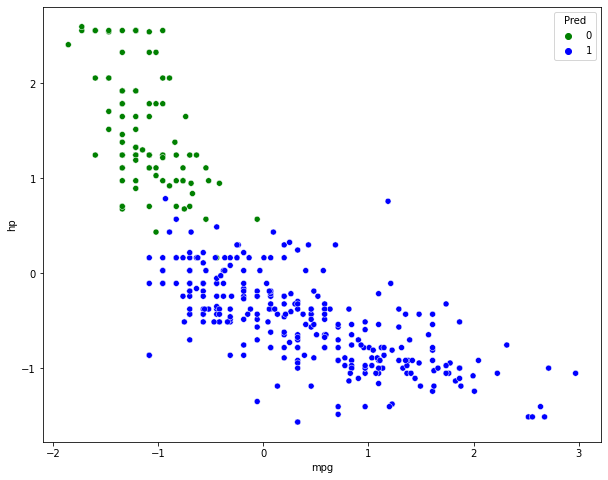

In [158]:
#we'll now plot graph according to the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="Pred",
              data=data_scaled, 
                    palette=['green','blue']);

Observations:
- We can now see 2 clusters created for our given dataset.
- The graph created above represents 2 clusters in green and blue color between Miles/gallon and Horsepower.

In [149]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    float64
 2   disp    392 non-null    float64
 3   hp      392 non-null    float64
 4   wt      392 non-null    float64
 5   acc     392 non-null    float64
 6   yr      392 non-null    float64
 7   Pred    392 non-null    int32  
dtypes: float64(7), int32(1)
memory usage: 26.0 KB


In [175]:
# now, we'll perform hierarchial clustering:
# again, we have taken the records and did the standadisation.

data_1 = dataset_final_1.iloc[:,0:7]
data_scaled_1 = data_1.apply(zscore)
data_scaled_1.head()


mpg       cyl      disp        hp        wt       acc        yr
0 -0.698638  1.483947  1.077290  0.704168  0.620540 -1.312137 -1.625315
1 -1.083498  1.483947  1.488732  1.650322  0.843334 -1.498326 -1.625315
2 -0.698638  1.483947  1.182542  1.244827  0.540382 -1.684515 -1.625315
3 -0.955212  1.483947  1.048584  1.244827  0.536845 -1.312137 -1.625315
4 -0.826925  1.483947  1.029447  0.974498  0.555706 -1.870705 -1.625315

In [176]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [183]:
# smaller the cophenet index the better is the clustering :

Z1 = linkage(data_scaled_1, metric='euclidean', method='centroid')
c1, coph_dists = cophenet(Z1 , pdist(data_scaled_1))
c1

0.7867138610584432

In [181]:
Z2 = linkage(data_scaled_1, metric='euclidean', method='complete')
c2, coph_dists = cophenet(Z2 , pdist(data_scaled_1))
c2

0.7624426859347365

In [182]:
Z3 = linkage(data_scaled_1, metric='euclidean', method='median')
c2, coph_dists = cophenet(Z3 , pdist(data_scaled_1))
c2

0.6842613728425571

- Using the Cophenet index, we found that the best score of 78.67 can be achieved with Metric as  Euclidean and method as CENTROID.


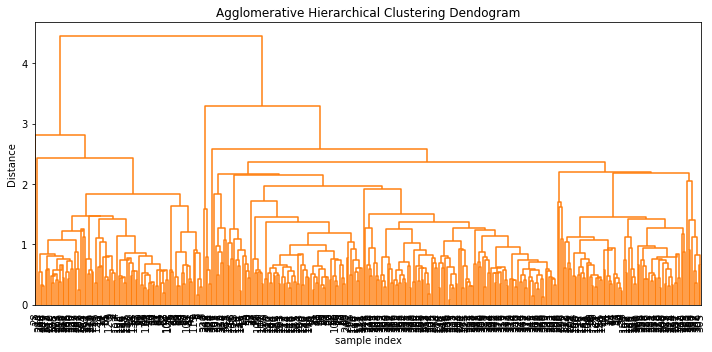

In [186]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z1, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10, )
plt.tight_layout()

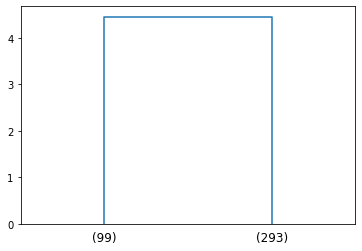

In [188]:
# dendrogram function to arrive at dendrogram
dendrogram(
    Z1,
    truncate_mode='lastp',  
    p=2,  
)
plt.show()

In [190]:
#adding the new clusters formed to the dataset
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z1, 2, criterion='maxclust')
data_scaled_1['clusters_H'] = clusters
data_scaled_1.head()

mpg       cyl      disp        hp        wt       acc        yr  \
0 -0.698638  1.483947  1.077290  0.704168  0.620540 -1.312137 -1.625315   
1 -1.083498  1.483947  1.488732  1.650322  0.843334 -1.498326 -1.625315   
2 -0.698638  1.483947  1.182542  1.244827  0.540382 -1.684515 -1.625315   
3 -0.955212  1.483947  1.048584  1.244827  0.536845 -1.312137 -1.625315   
4 -0.826925  1.483947  1.029447  0.974498  0.555706 -1.870705 -1.625315   

   clusters_H  
0           1  
1           1  
2           1  
3           1  
4           1

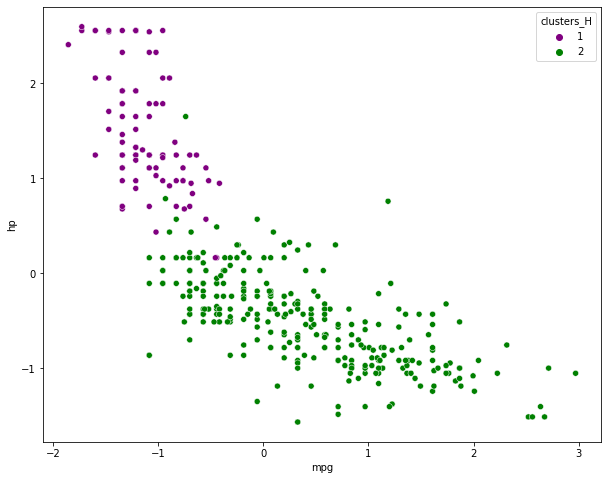

In [193]:
#plotting the clusters formed

plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="clusters_H",
              data=data_scaled_1, 
                    palette=['purple','green']);

### 5. Answer below questions based on outcomes of using ML based methods. [ Score: 5 points ]
- Mention how many optimal clusters are present in the data and what could be the possible reason behind it.
- Use linear regression model on different clusters separately and print the coefficients of the models individually
- How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction.

In [194]:
# Answer 1 = The optimal number of clusters that can be derived for this dataset is - 2.
# we made this conclusion based on the kelbow method.

In [240]:
# we'll now put the Linear Regression model on the dataset:

#1. Using Orignal dataset:

# independet variable
X = dataset_final_1.drop(['mpg','origin'], axis=1)

# dependent variable
y = dataset_final_1[['mpg']]
    

In [264]:
# Split X and y into training and test set in 70:30 ratio and fitting the LR model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [261]:
regression_model.score(X_train, y_train)

0.8020479678803313

In [265]:
regression_model.score(X_test, y_test)

0.8251059038684684

Observation:
- With LR, we can see that for our ORIGNAL dataset, we got 80% score for training data and 82.5% for test data.

- Now, we'll perform LR on the K means clustered data

In [314]:
#Linear regression on data with K means cluster
dataset_final_2 = dataset_final_1
dataset_final_2['clusters_H'] = data_scaled_1['clusters_H']

In [315]:
dataset_final_2['clusters_H']=dataset_final_2['clusters_H'].astype('category')
dataset_final_2['clusters_H'] = dataset_final_2['clusters_H'].replace({1: 'Type 1', 0: 'Type 2'})

In [316]:
dataset_final_2.head()

mpg  cyl   disp     hp    wt   acc  yr  origin clusters_H
0  18.0    8  307.0  130.0  3504  12.0  70       1     Type 1
1  15.0    8  350.0  165.0  3693  11.5  70       1     Type 1
2  18.0    8  318.0  150.0  3436  11.0  70       1     Type 1
3  16.0    8  304.0  150.0  3433  12.0  70       1     Type 1
4  17.0    8  302.0  140.0  3449  10.5  70       1     Type 1

In [317]:
dataset_final_2 = pd.get_dummies(dataset_final_2, columns=['clusters_H'])

In [318]:
dataset_final_2.head()

mpg  cyl   disp     hp    wt   acc  yr  origin  clusters_H_2  \
0  18.0    8  307.0  130.0  3504  12.0  70       1             0   
1  15.0    8  350.0  165.0  3693  11.5  70       1             0   
2  18.0    8  318.0  150.0  3436  11.0  70       1             0   
3  16.0    8  304.0  150.0  3433  12.0  70       1             0   
4  17.0    8  302.0  140.0  3449  10.5  70       1             0   

   clusters_H_Type 1  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1

In [319]:
# again dividing the data:

X = dataset_final_2.drop(['mpg'], axis=1)
# the dependent variable
y = dataset_final_2[['mpg','clusters_H_2']]

In [320]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

regression_model.score(X_train, y_train)

0.8014949133197267

In [322]:
regression_model.score(X_test, y_test)

0.8251059038684684

Observations:

- K-means clustering was best fit to explain the highest variation in the datset.
- When LR was implemented on the dataset (both from the actual and the Predicted one) we got almost similar score proving that the clustering results are much better fit for the dataset. 

### Improvisation: [ Score: 2 points ]
- Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to perform a better data analysis in future.

Observations:
- The dataset was smaller to be worked upon, it would of great help if we had more records present.
- The ambiguiti with the data was, how many times the used cars were handed down (was it used only by 2 people or was it handed down between many drivers)
- Reason for selling or buying the used car could also help with better predictions and modelling.
- For what purpose, the car was used in 1st, 2nd handdowns, would also provide greater knowledge of used cars.
- Gender could also be a factor for analysis. Which group bought more used cars, which group sold used cars and more.


# Part 2 -
- Goal is to build a synthetic data generation model using the existing data provided by the company. 
- DOMAIN: Automobile
- CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

In [324]:
df = pd.read_excel('Part2 - Company.xlsx')

In [325]:
df.head()

A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131        NaN
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A

In [327]:
df.shape

(61, 5)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [340]:
# we can see that the Categorical field 'Quality' has NULL values:

df.Quality.isnull().value_counts()

False    43
True     18
Name: Quality, dtype: int64

In [341]:
df.Quality.value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

- We have 18 null records present in dataset that needs to be imputed.
- We can see that there are total = 61 values, out of which we have data present for 43 records.
- out of 43, we have 'Quality A' as 26 records and 'Quality B' as 17 records.

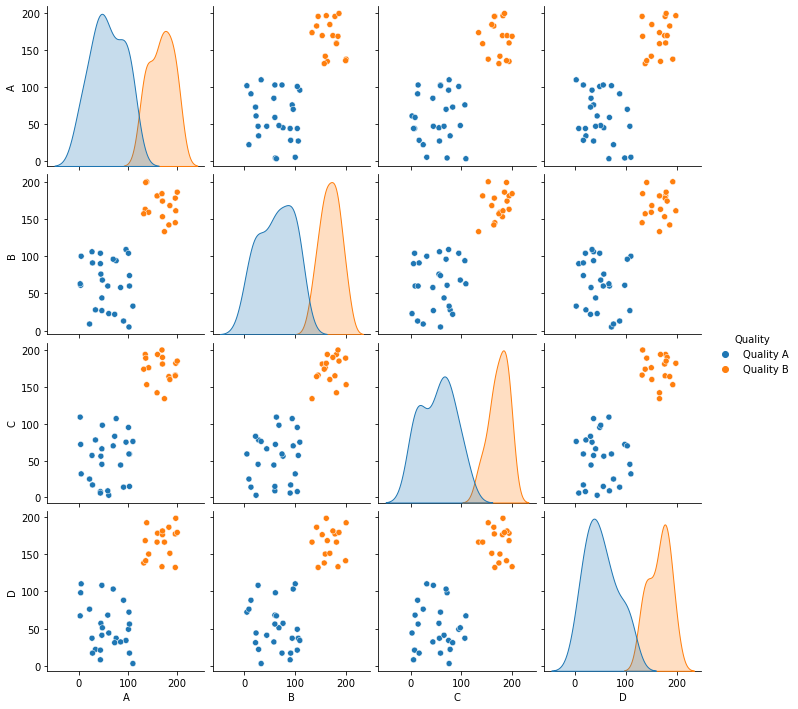

In [339]:
sns.pairplot(df, diag_kind='kde', hue='Quality')

In [350]:
# now we'll produce K means clustering model to identify the missing Quaity.

# we'll perform the zscoring standarization on the dataset

df1 = df.drop(['Quality'], axis = 1)

In [352]:
df2 = df1.apply(zscore)
df2.head()

A         B         C         D
0 -1.168034 -1.561080 -1.061569 -0.103138
1  0.904992  0.284923  0.306077  0.823013
2  0.660147  0.807376  0.321443  0.264129
3 -0.939512 -1.630740 -1.706975 -1.125099
4 -0.972158 -0.986381 -1.614775 -0.741864

In [353]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       61 non-null     float64
 1   B       61 non-null     float64
 2   C       61 non-null     float64
 3   D       61 non-null     float64
dtypes: float64(4)
memory usage: 2.0 KB


In [354]:
#applying kmeans with 2 centroids
k_means = KMeans(n_clusters = 2)
k_means.fit(df2)
labels = k_means.labels_

In [357]:
# Calculating silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(df2,labels)

0.6891674125195145

In [359]:
# we'll append the newly created labels against the old data
labels

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int32)

In [361]:
df['new_label'] = labels

In [367]:
df.head()

A    B    C    D    Quality  new_label
0   47   27   45  108  Quality A  Quality A
1  174  133  134  166  Quality B  Quality B
2  159  163  135  131        NaN  Quality B
3   61   23    3   44  Quality A  Quality A
4   59   60    9   68  Quality A  Quality A

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   A          61 non-null     int64 
 1   B          61 non-null     int64 
 2   C          61 non-null     int64 
 3   D          61 non-null     int64 
 4   Quality    43 non-null     object
 5   new_label  61 non-null     object
dtypes: int64(4), object(2)
memory usage: 3.0+ KB


In [364]:
# we'll make some changes to compare data

df.new_label = df.new_label.replace({0:'Quality A', 1:"Quality B"})

In [365]:
df.head()

A    B    C    D    Quality  new_label
0   47   27   45  108  Quality A  Quality A
1  174  133  134  166  Quality B  Quality B
2  159  163  135  131        NaN  Quality B
3   61   23    3   44  Quality A  Quality A
4   59   60    9   68  Quality A  Quality A

In [377]:
# lets try and have a quick comparasion between new predicted labels and old labels:
df3 = df.dropna()

a = df3.Quality
b = df3.new_label

cm = confusion_matrix(a, b)
cm

array([[26,  0],
       [ 0, 17]])

- From the above checks, its clear that the clustering technique has correctly identified the Quality labels against the 43 not null records.
- Hence we can assume that the labels created now are also representing the correct Quality types for NaN values.

# Part 3:

- DOMAIN: Automobile
 
- CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

- DATA DESCRIPTION: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

- All the features are numeric i.e. geometric features extracted from the silhouette.

- PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using just the raw data.

In [78]:
# 1. Data import and checks:
data = pd.read_csv("Part3 - vehicle.csv")
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [83]:
# we can see a some null values present in dataset.
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [84]:
# we'll be replacing the missing values with their respective median values
for cols in data.columns:
    if(cols != 'class'): 
        data[cols] = data[cols].fillna(data[cols].median())

In [85]:
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [86]:
# now our dataset is ready to be worked upon

# 2. EDA and statistical anslysis of dataset.
data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

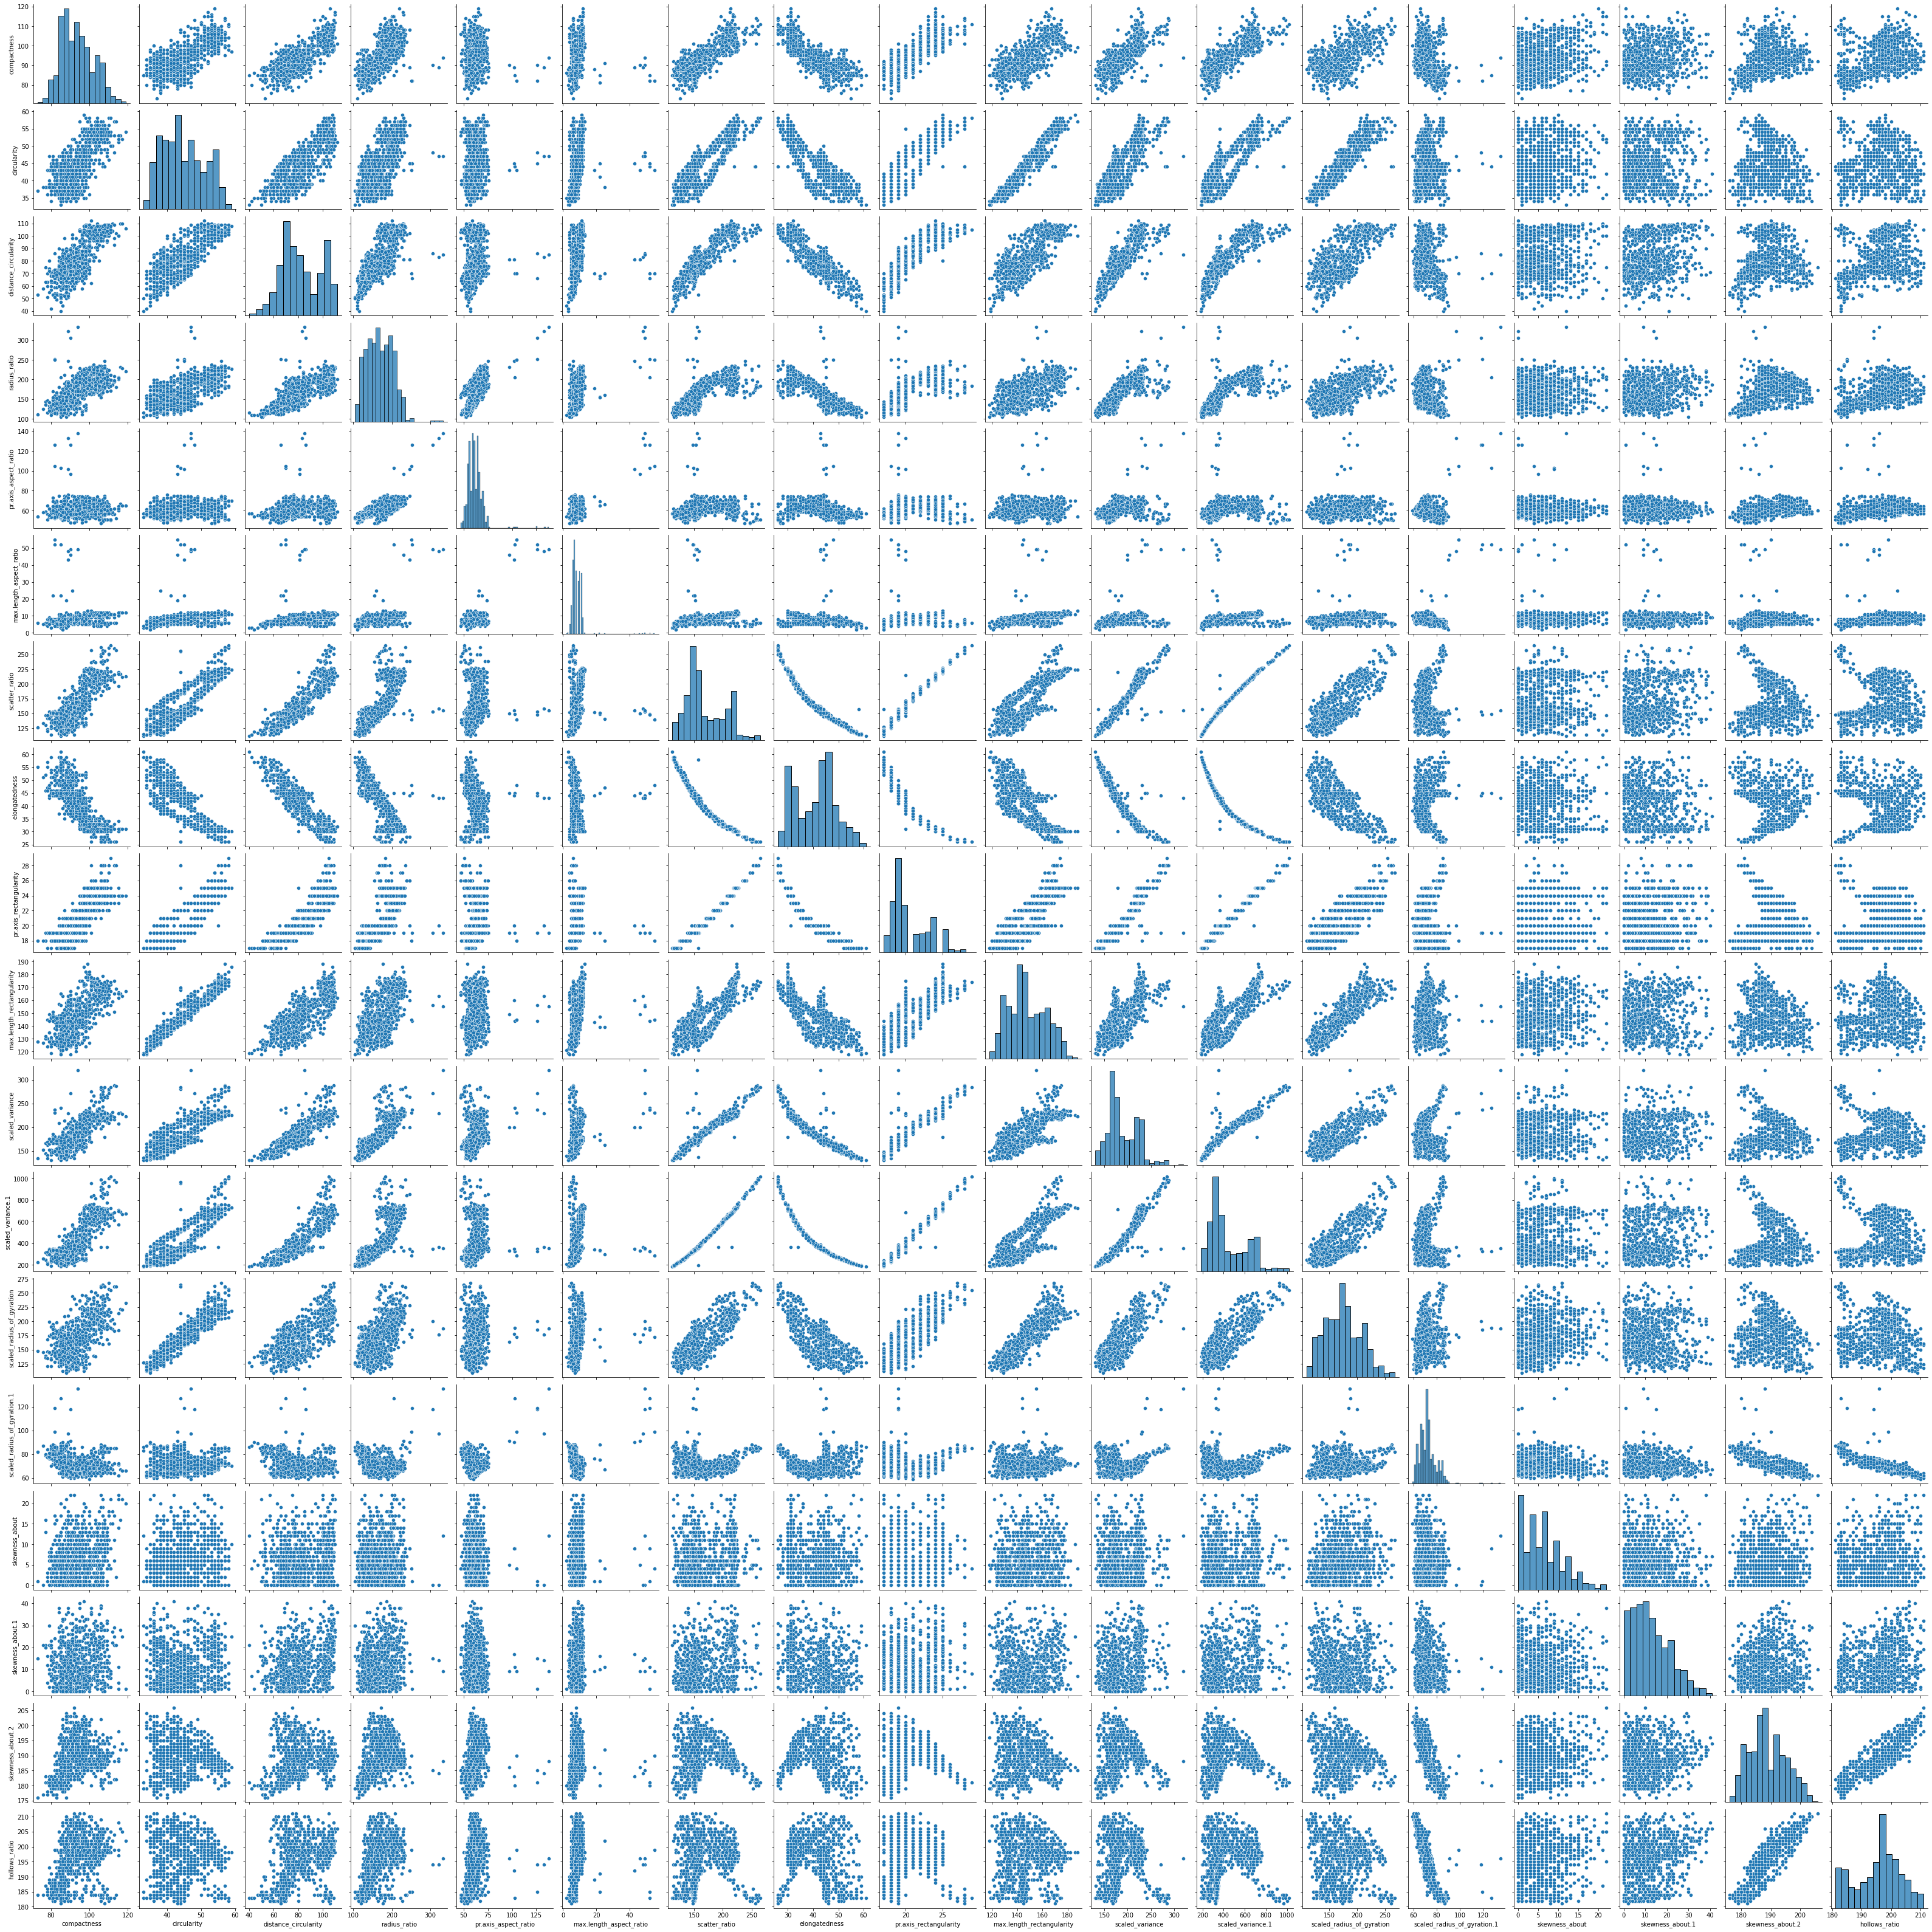

In [87]:
sns.pairplot(data)

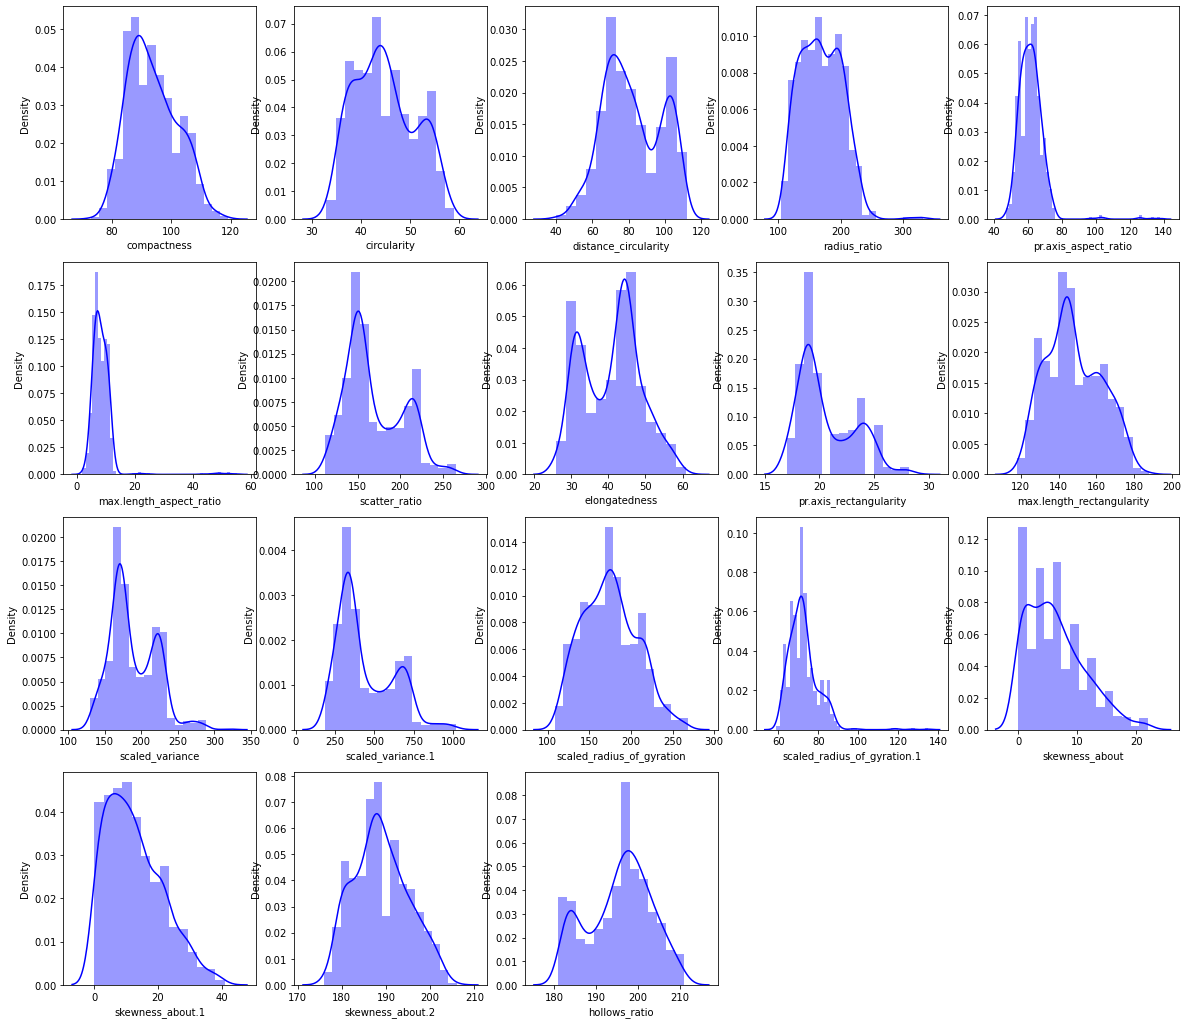

In [90]:
# well, that took some time :D.
# from the graphs, we see some positive and some negative relations between columns.

# we'll start only with numerical data first:
plt.figure(figsize=(20, 18))

col = 1

for i in data.drop(columns='class').columns:
    plt.subplot(4, 5, col)
    sns.distplot(data[i], color = 'b')
    col += 1 

Observations:

- The columns have data distributed across multiple scales in our dataset. 
- Many columns have distributions that are not unimodal with 2 peaks while some have data that is right skewed whereas  else data is  normally distributed.
- Some columns have long right tail as evident from the above distplot it is highly likely that they will have outliers

car    429
bus    218
van    199
Name: class, dtype: int64


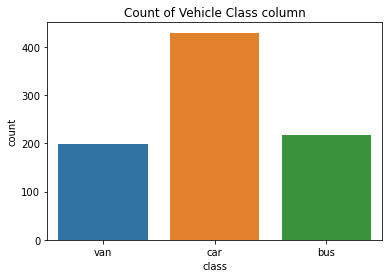

In [92]:
#Now, we'll be checking the distribution of the Object class-

print(data['class'].value_counts())

plt.title('Count of Vehicle Class column')
sns.countplot(x = 'class', data = data);

In [93]:
# we can see that the class is not equally balanced among the 3 groups.
# before modelling, we'll balance out the classes to populate best results

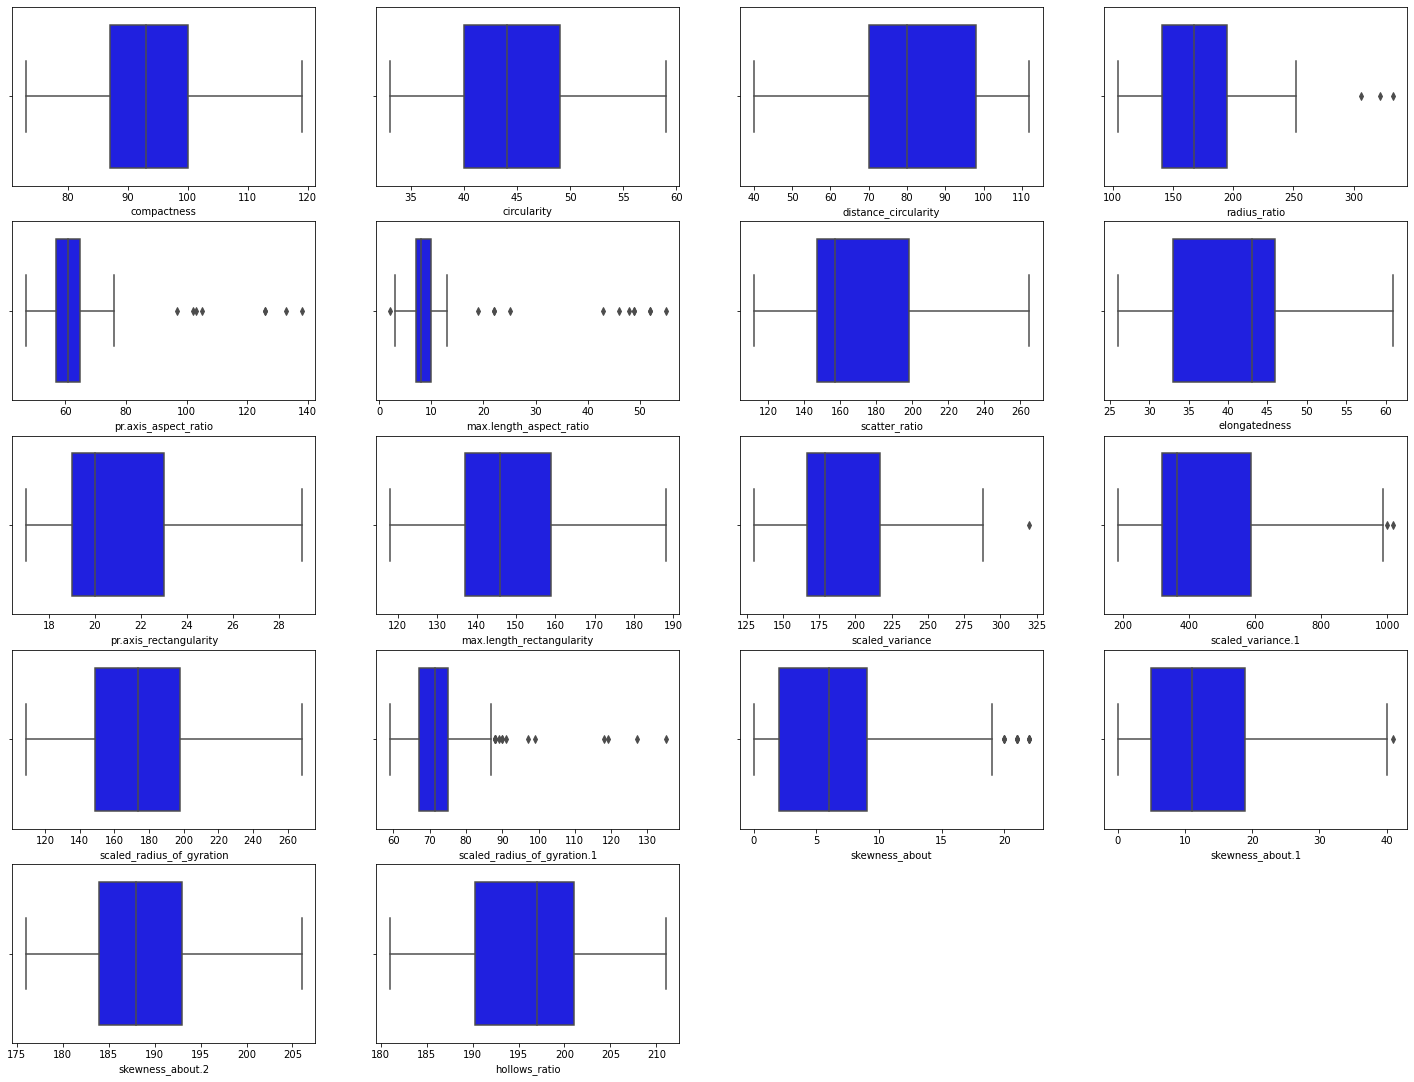

In [94]:
# to check the outliers, we'll drow the boxplots-:
plt.figure(figsize=(25,23))

col = 1

for i in data.drop(columns='class').columns:
    plt.subplot(6, 4, col)
    sns.boxplot(data[i],color='blue')
    col += 1


In [95]:
# as expected, the Cols with high right skewness in density graph shows more outliers present.

# we'll treat the outliers in uing the IQR by replacing them with median.

for col_name in data.drop(columns = 'class').columns:
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    data.loc[(data[col_name] < low) | (data[col_name] > high), col_name] = data[col_name].median()

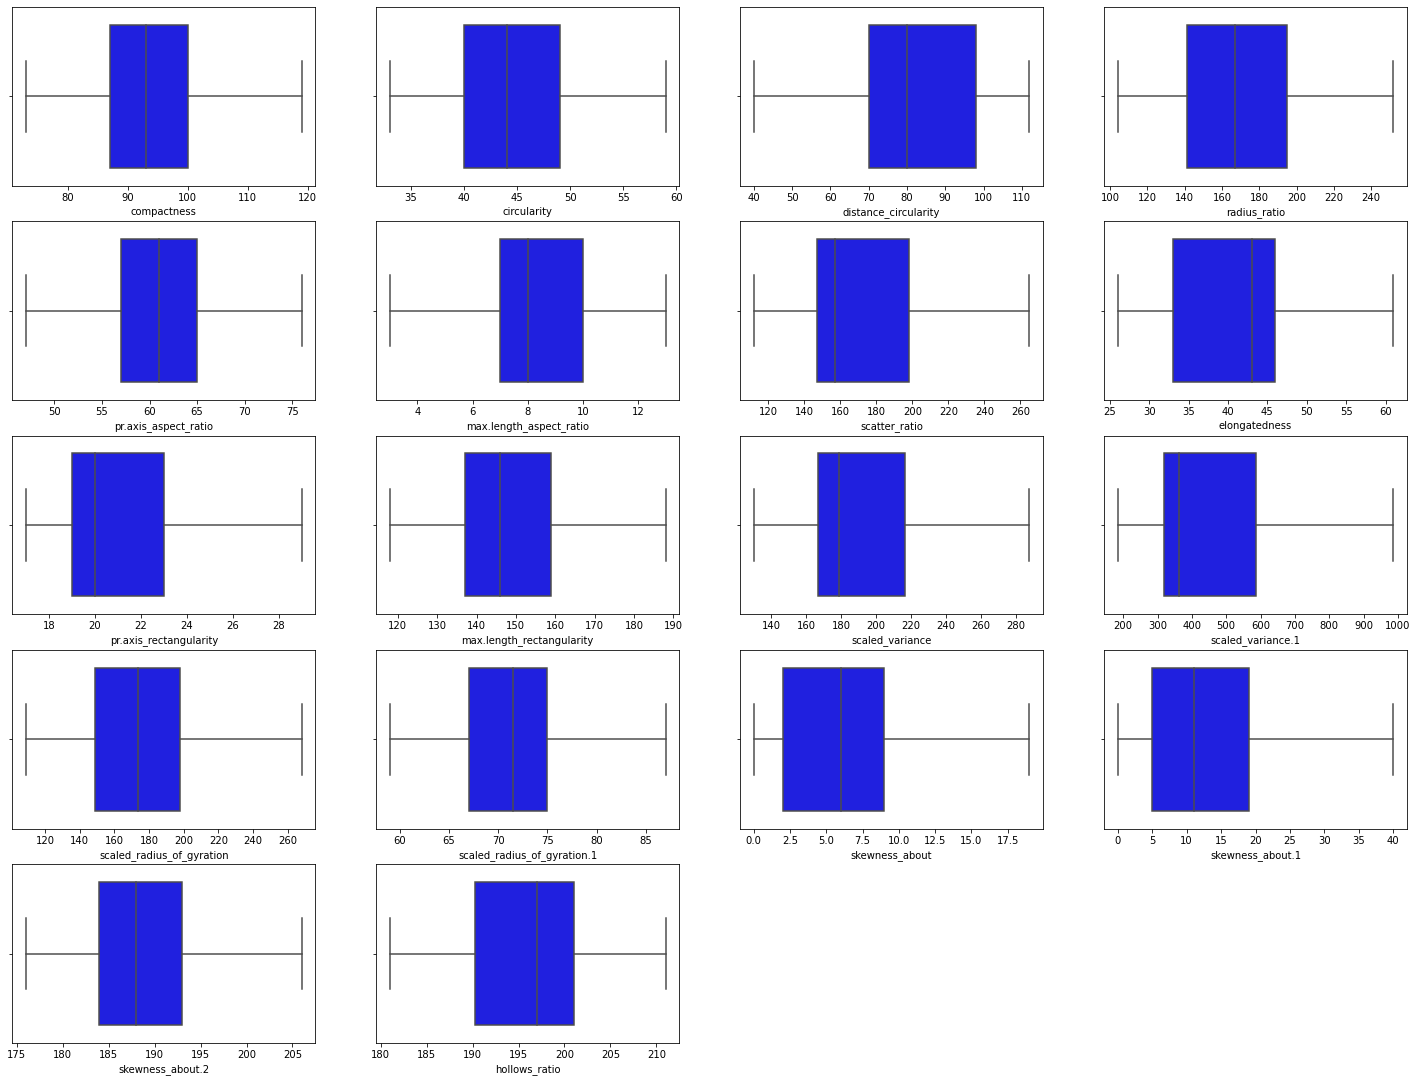

In [96]:
# to check the outliers, we'll drow the boxplots-:
plt.figure(figsize=(25,23))

col = 1

for i in data.drop(columns='class').columns:
    plt.subplot(6, 4, col)
    sns.boxplot(data[i],color='blue')
    col += 1

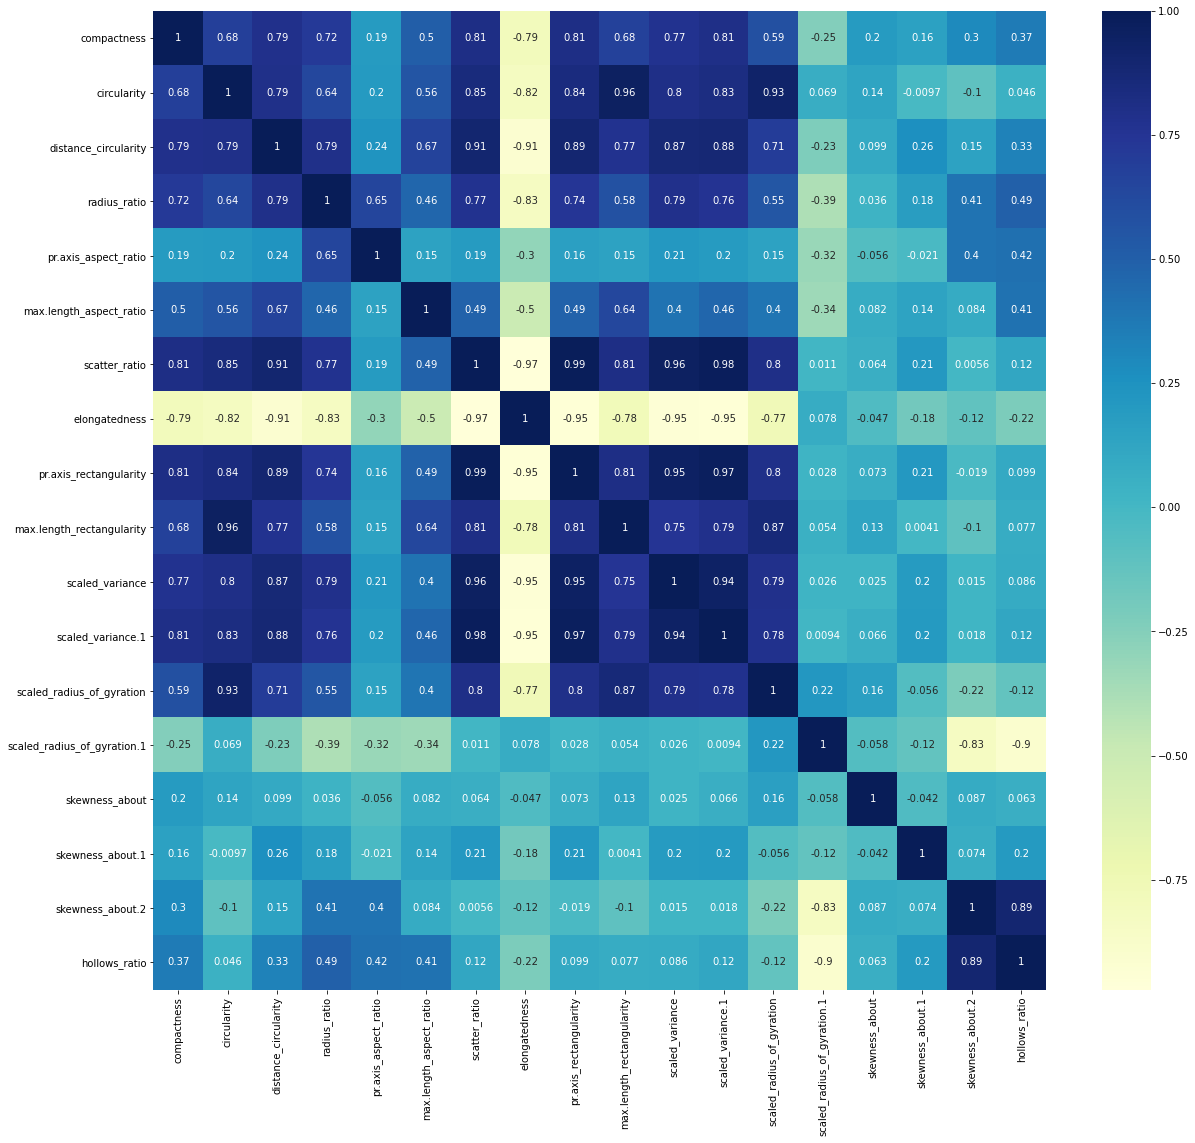

In [97]:
# we got good results in treating the outliers :)

# now, we will check the corelation between the cols using corr and graph.
# this always helps to understand the dependency of cols with other cols and helps identify which cols are more data centric.

plt.figure(figsize=(20,18))

corr=data.corr()
sns.heatmap(corr,annot=True,cmap = 'YlGnBu' );

In [98]:
# to check the distribution of dataset with target class:

# 1st, we'll split the dataset-
X = data.loc[:, data.columns != 'class']
y = data['class'].astype('category').cat.codes

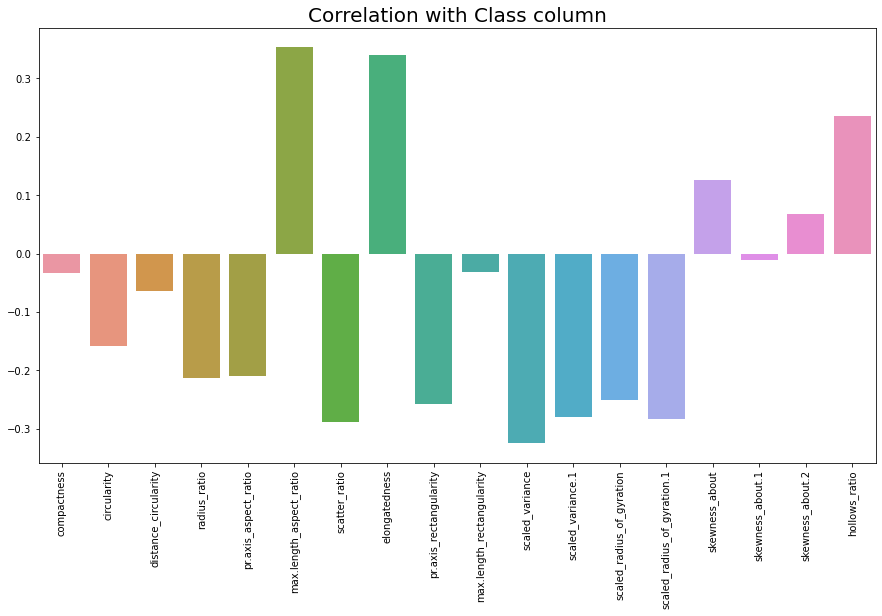

In [99]:
# 2nd, we'll be plotting the correlation with variable class-

plt.figure(figsize = (15, 8))
ax=sns.barplot(x=X.columns, y = X.corrwith(y))
sns.barplot(x = X.columns, y = X.corrwith(y))
plt.title('Correlation with Class column', fontsize = 20)
x=plt.setp(ax.get_xticklabels(), rotation=90)

In [100]:
# Now, we have 18 dimensions present for the dataset, and as seen from the CORR relation plot, 
#    not all are proven to be contibuting to the dataset.

# Hence, we'll perform PCA to reduce the dimensions and for better model generation.

# 1st, scaling is needed:

XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.300945   
1    -0.325470    -0.623732              0.120741     -0.850666   
2     1.254193     0.844303              1.519141      1.265808   
3    -0.082445    -0.623732             -0.006386     -0.290423   
4    -1.054545    -0.134387             -0.769150      1.141310   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.933135                 0.912212      -0.207598   
1             -0.740596                 0.427456      -0.599423   
2              0.863642                 0.912212       1.148719   
3              0.328896                 0.427456      -0.750125   
4             -0.027601                -0.057300      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.400771          -0.337407                   0.285705   
1        -0.594220          -0.618623                  -0.513630   
2         1.114582           1.131806                   1.392477   
3        -0.916635          -0.739145                  -1.466683   
4         1.694930          -0.647319                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.315806       -0.032330          0.387162   
1                     0.009122        0.624090          0.161740   
2                     0.171586        1.718123         -0.401818   
3                    -1.453054       -0.032330         -0.289106   
4                    -0.072110        0.624090         -0.176395   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

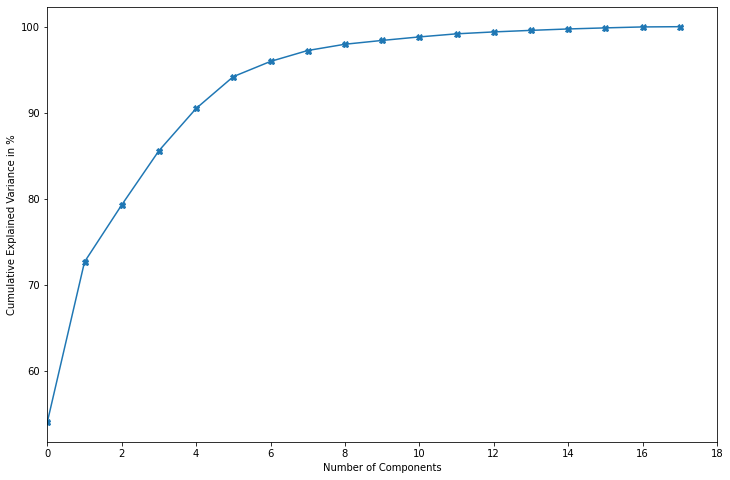

In [104]:
#to view data before PCA, we'll be plotting the cummulative variance.

from sklearn.decomposition import PCA

pca = PCA()
X_pca_ = pca.fit_transform(XScaled)
plt.figure(figsize = (12, 8))
plt.plot((np.cumsum(pca.explained_variance_ratio_) * 100), marker = 'X')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance in %');

In [106]:
pca.explained_variance_

array([9.74940269e+00, 3.35071912e+00, 1.19238155e+00, 1.13381916e+00,
       8.83997312e-01, 6.66265745e-01, 3.18150910e-01, 2.28179142e-01,
       1.31018595e-01, 7.98619108e-02, 7.33979478e-02, 6.46162669e-02,
       4.01448646e-02, 3.22758478e-02, 2.93936408e-02, 2.27005257e-02,
       1.98136761e-02, 5.16287320e-03])

Text(0, 0.5, 'Cumulative EXPLAINED Variance in % ')

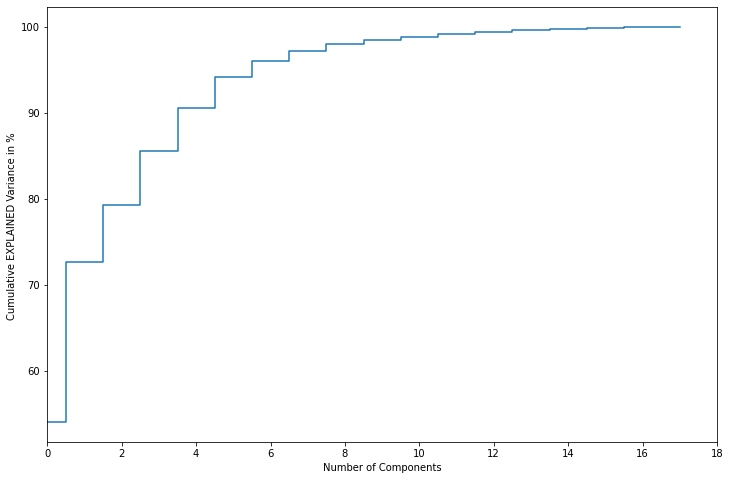

In [107]:
# from above cofficients, we can deduce that the first 7 or 8 have some explanation on dataset, 
#. while the rest are not contributing much.

# to make absolute decision, we'll plot the graph again with EXPLAINED VARAINECE

plt.figure(figsize = (12, 8))
plt.step(list(range(18)), (np.cumsum(pca.explained_variance_ratio_) * 100), where = 'mid')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative EXPLAINED Variance in % ')


In [113]:
# we can see that almost 90% of data can be explained by 5 variables. 95% with 6 variables.
# after, the graph seems to become straight.

pca_n = PCA(n_components=6)
pca_n.fit(XScaled)
print('PCA components:\n',pca_n.components_)
print('-----------------------------------------------------------')
print('PCA explained components:\n',pca_n.explained_variance_ratio_)
Xpca_n = pca_n.transform(XScaled)

PCA components:
 [[ 0.27250289  0.28725469  0.30242111  0.26971354  0.09786073  0.19520014
   0.31052393 -0.3090069   0.307287    0.27815416  0.29976509  0.30553237
   0.26323762 -0.04193594  0.03608321  0.05872048  0.03801314  0.08474   ]
 [-0.08704358  0.13162176 -0.04614301 -0.19793126 -0.25783995 -0.10804563
   0.07528535 -0.01322994  0.0875602   0.12215424  0.07726575  0.07150302
   0.21058205  0.50362158 -0.01576632 -0.09274624 -0.50162122 -0.50761211]
 [-0.03818521 -0.20114691  0.06346211  0.05628517 -0.06199275 -0.14895782
   0.10904283 -0.09085269  0.1060705  -0.21368469  0.1445998   0.11034374
  -0.20287019  0.07386402 -0.55917399  0.6706805  -0.06224071 -0.04170535]
 [ 0.13867501 -0.03805548  0.10895429 -0.25435509 -0.61276572  0.27867816
   0.00539295  0.06521486  0.03089915  0.04146747 -0.06400509 -0.00219687
  -0.08553965 -0.11539962  0.47370331  0.42842603 -0.0274096   0.09603749]
 [ 0.13710147 -0.13899555 -0.08001743  0.13374437  0.12360146 -0.63489336
   0.08555745 -0.

In [114]:
pca_6 = PCA(n_components = 6)
X_pca = pca_6.fit_transform(XScaled)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 18
Reduced number of features: 6


In [116]:
# lets review some of the new PCA components:
pca_df = pd.DataFrame(data = X_pca)
pca_df.head(7)

0         1         2         3         4         5
0  0.584228 -0.675673 -0.453334 -0.750656 -0.777515 -1.848809
1 -1.512180 -0.348934 -0.333436  1.268953 -0.324929 -0.118317
2  3.913448  0.234507 -1.265094  0.137224  0.915751 -0.685594
3 -1.535193 -3.044413 -0.469623  0.324317 -0.611590  0.367777
4 -0.642062  1.488882 -0.246288 -0.550939  0.471655 -1.012697
5  5.382325  4.658285  1.173395  0.242066  1.587378  2.508100
6 -0.813699 -2.220045 -1.962160 -0.410052  1.522932  0.655823

### We'll now proceed with the SVM modelling:
1. SVM on origna Dataset
2. SVM on PCA generated dataset.

In [117]:
# splitting the orignal dataset.

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.3, random_state = 10)

In [119]:
# shapes of the train and test data:
print('train shape:',X_train.shape)
print('test shape:',X_test.shape)

train shape: (592, 18)
test shape: (254, 18)


In [120]:
# now, we'll be splitting the PCA dataset.

X_tr, X_te, y_tr, y_te = train_test_split(X_pca, y, test_size = 0.3, random_state = 10)

In [121]:
# shapes of the train and test PCA data:
print('PCA train shape:',X_tr.shape)
print('PCA test shape:',X_te.shape)

PCA train shape: (592, 6)
PCA test shape: (254, 6)


In [124]:
## Model creation:

#  Support Vector Machine on train data
svc_model = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model.fit(X_train, y_train)

SVC(C=4)

In [132]:
#predicting on train data
from sklearn import metrics
sv_train_predict = svc_model.predict(X_train)
print('Train accuracy:',metrics.accuracy_score(y_train, sv_train_predict))


Train accuracy: 0.9898648648648649


In [136]:
sv_test_predict = svc_model.predict(X_test)
print('Test accuracy:',metrics.accuracy_score(y_test, sv_test_predict))

Test accuracy: 0.968503937007874


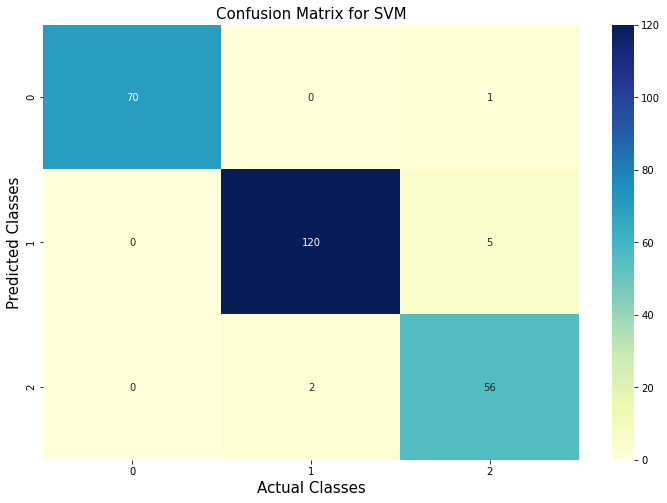

In [140]:
# to view the results and visualize, we'll drow confusion matrix graph:
cm= confusion_matrix(y_test, sv_test_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [141]:
print("Classification Report")
print(metrics.classification_report(y_test, sv_test_predict, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.98      0.96      0.97       125
           2       0.90      0.97      0.93        58

    accuracy                           0.97       254
   macro avg       0.96      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254



In [138]:
# Creating the PCA SVC model and predicting on train data Of PCA 

svc_model_pca = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model_pca.fit(X_tr, y_tr)


sv_tr_predict = svc_model_pca .predict(X_tr)
print('Train accuracy for PCA: ',metrics.accuracy_score(y_tr, sv_tr_predict))

Train accuracy for PCA:  0.9476351351351351


In [139]:
sv_te_predict = svc_model_pca .predict(X_te)
print('Test accuracy on PCA data: ',metrics.accuracy_score(y_te, sv_te_predict))

Test accuracy on PCA data:  0.9212598425196851


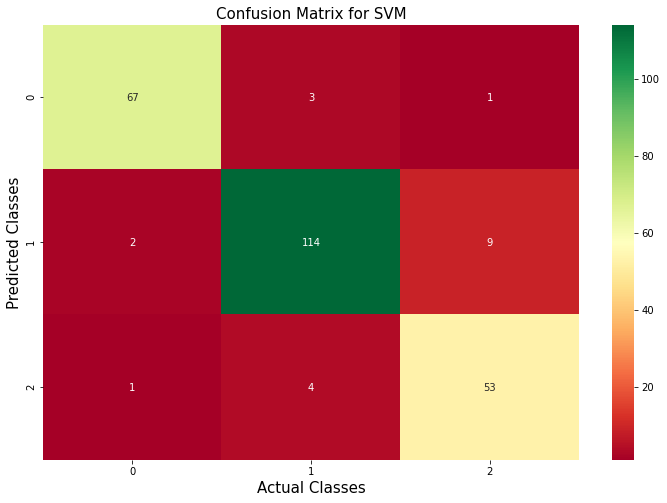

In [142]:
cm = confusion_matrix(y_te, sv_te_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [143]:
print("Classification Report")
print(metrics.classification_report(y_te, sv_te_predict, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.94      0.91      0.93       125
           2       0.84      0.91      0.88        58

    accuracy                           0.92       254
   macro avg       0.91      0.92      0.92       254
weighted avg       0.92      0.92      0.92       254



Observations:
- Both the models produced 90+% accuracy in test data.
- PCA model, with only 6 cols, produced score of 92% whereas the orignal model produced 96%.
- Recall for PCA model - 92% whereas for orignal model - 97%.
- Precision for PCA model - 91% , for Orignal model - 96%.

END of PART 3.

# Part 4-
- DOMAIN: Sports management
- CONTEXT: Company X is a sports management company for international cricket.
- PROJECT OBJECTIVE: Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.

In [30]:
df = pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')

In [31]:
df.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


In [33]:
df.shape

(180, 7)

In [34]:
df = df.dropna()

In [35]:
df = df.reset_index()

In [36]:
df.drop(columns='index', inplace=True)

In [37]:
print(df.head())
print(df.shape)

        Name   Runs    Ave      SR  Fours  Sixes   HF
0   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
1  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
2   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
3   CL White  479.0  43.54  149.68   41.0   20.0  5.0
4   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0
(90, 7)


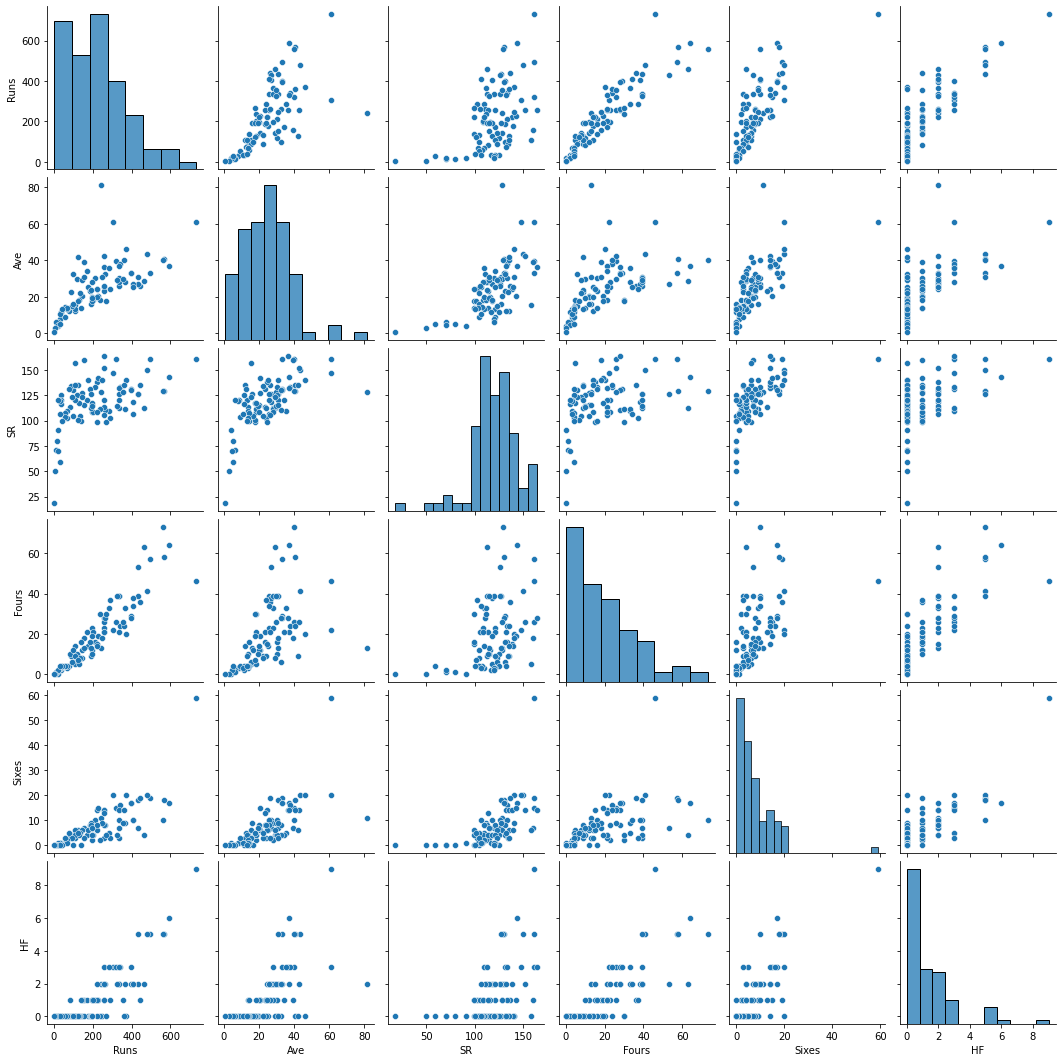

In [397]:
# Now, we'll perform the EDA and Statistical analysis:
sns.pairplot(df)

In [398]:
df.describe().T

count        mean         std    min      25%      50%       75%  \
Runs    90.0  219.933333  156.253669   2.00   98.000  196.500  330.7500   
Ave     90.0   24.729889   13.619215   0.50   14.665   24.440   32.1950   
SR      90.0  119.164111   23.656547  18.18  108.745  120.135  131.9975   
Fours   90.0   19.788889   16.399845   0.00    6.250   16.000   28.0000   
Sixes   90.0    7.577778    8.001373   0.00    3.000    6.000   10.0000   
HF      90.0    1.188889    1.688656   0.00    0.000    0.500    2.0000   

          max  
Runs   733.00  
Ave     81.33  
SR     164.10  
Fours   73.00  
Sixes   59.00  
HF       9.00

    - We can see that there's a positive relationship between some of the columns from dataset.
    - Dataset was cleaned and prepared for the analysis.
    - Before modelling, we have to make standarization of dataaset.

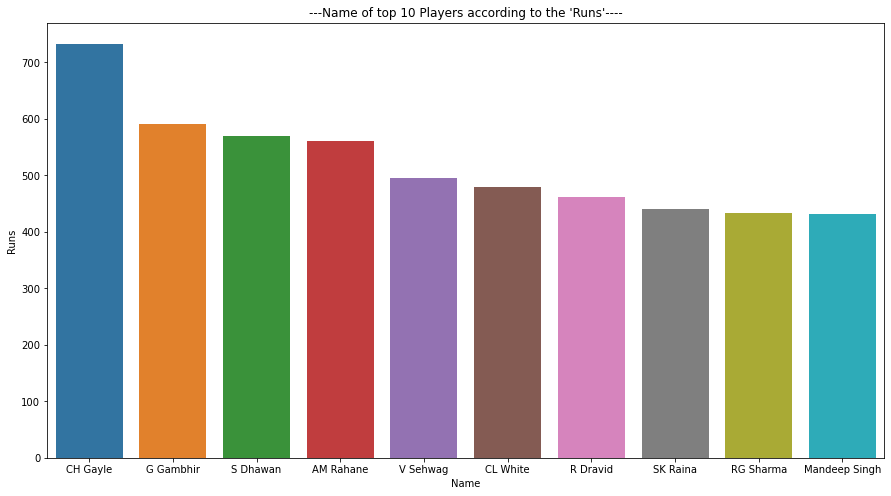

In [400]:
plt.figure(figsize=(15,8))
var=df.groupby('Name')['Runs'].sum().sort_values(ascending = False ).head(10)
var= var.reset_index() 
var.columns = ['Name' ,'Runs']
sns.barplot(data= var , x= 'Name' , y ='Runs');
plt.title("---Name of top 10 Players according to the 'Runs'----");

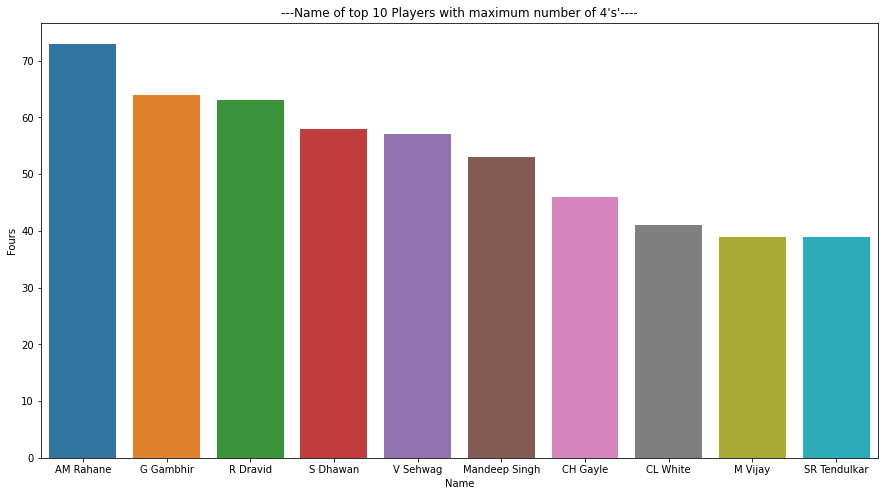

In [402]:
plt.figure(figsize=(15,8))
var=df.groupby('Name')['Fours'].sum().sort_values(ascending = False ).head(10)
var= var.reset_index() 
var.columns = ['Name' ,'Fours']
sns.barplot(data= var , x= 'Name' , y ='Fours');
plt.title("---Name of top 10 Players with maximum number of 4's'----");

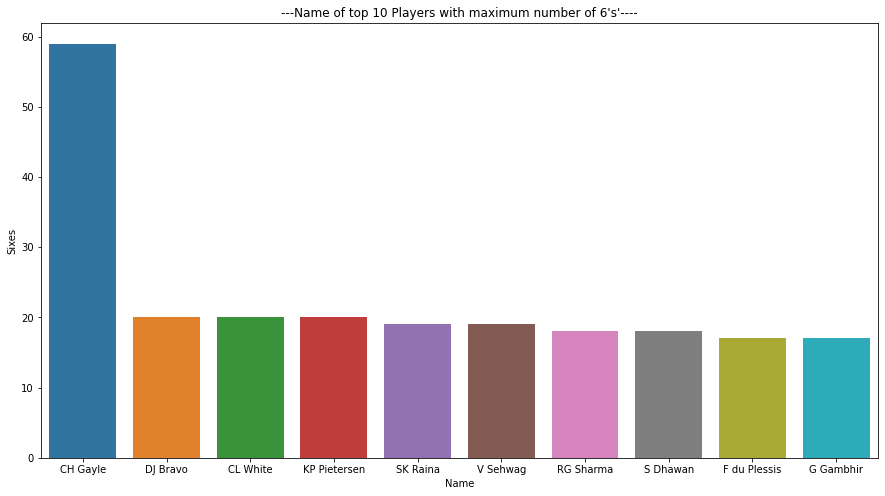

In [403]:
plt.figure(figsize=(15,8))
var=df.groupby('Name')['Sixes'].sum().sort_values(ascending = False ).head(10)
var= var.reset_index() 
var.columns = ['Name' ,'Sixes']
sns.barplot(data= var , x= 'Name' , y ='Sixes');
plt.title("---Name of top 10 Players with maximum number of 6's'----");

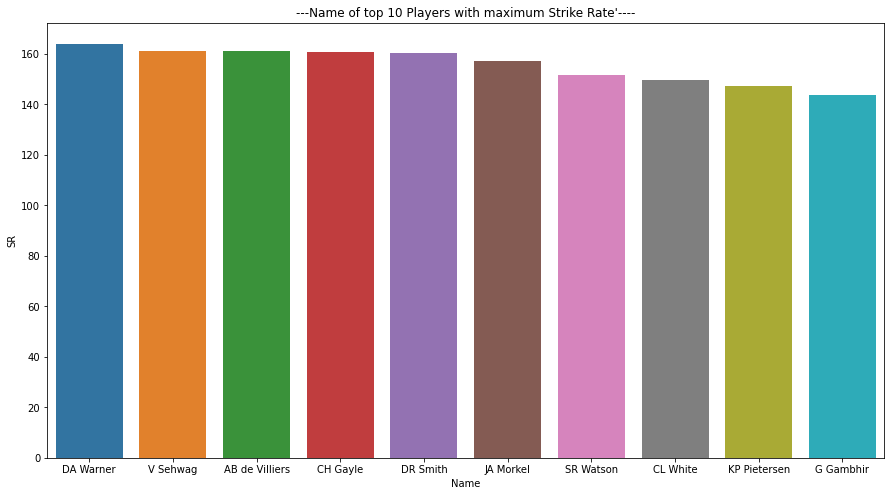

In [412]:
plt.figure(figsize=(15,8))
var=df.groupby('Name')['SR'].sum().sort_values(ascending = False ).head(10)
var= var.reset_index() 
var.columns = ['Name' ,'SR']
sns.barplot(data= var , x= 'Name' , y ='SR');
plt.title("---Name of top 10 Players with maximum Strike Rate'----");

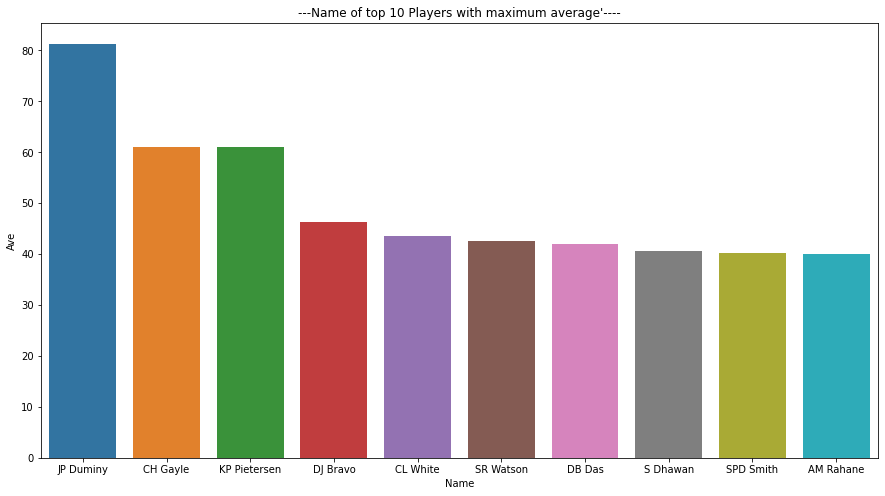

In [411]:
plt.figure(figsize=(15,8))
var=df.groupby('Name')['Ave'].sum().sort_values(ascending = False ).head(10)
var= var.reset_index() 
var.columns = ['Name' ,'Ave']
sns.barplot(data= var , x= 'Name' , y ='Ave');
plt.title("---Name of top 10 Players with maximum average'----");

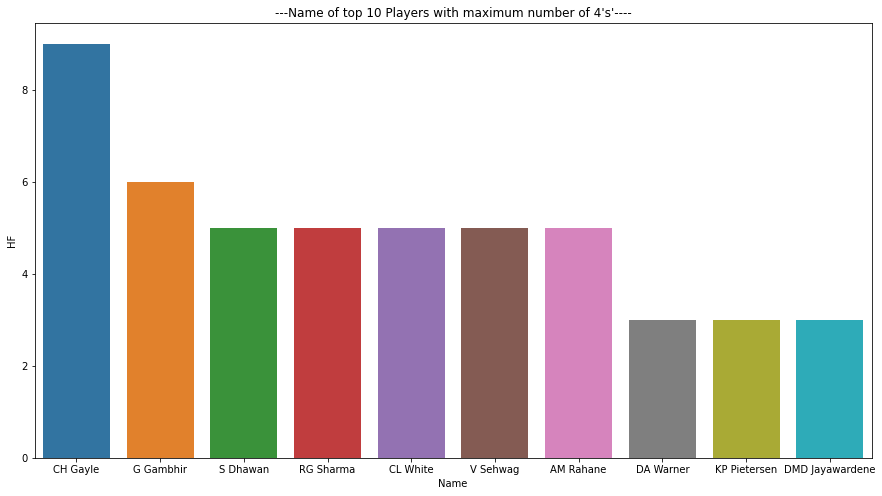

In [410]:
plt.figure(figsize=(15,8))
var=df.groupby('Name')['HF'].sum().sort_values(ascending = False ).head(10)
var= var.reset_index() 
var.columns = ['Name' ,'HF']
sns.barplot(data= var , x= 'Name' , y ='HF');
plt.title("---Name of top 10 Players with maximum number of 4's'----");

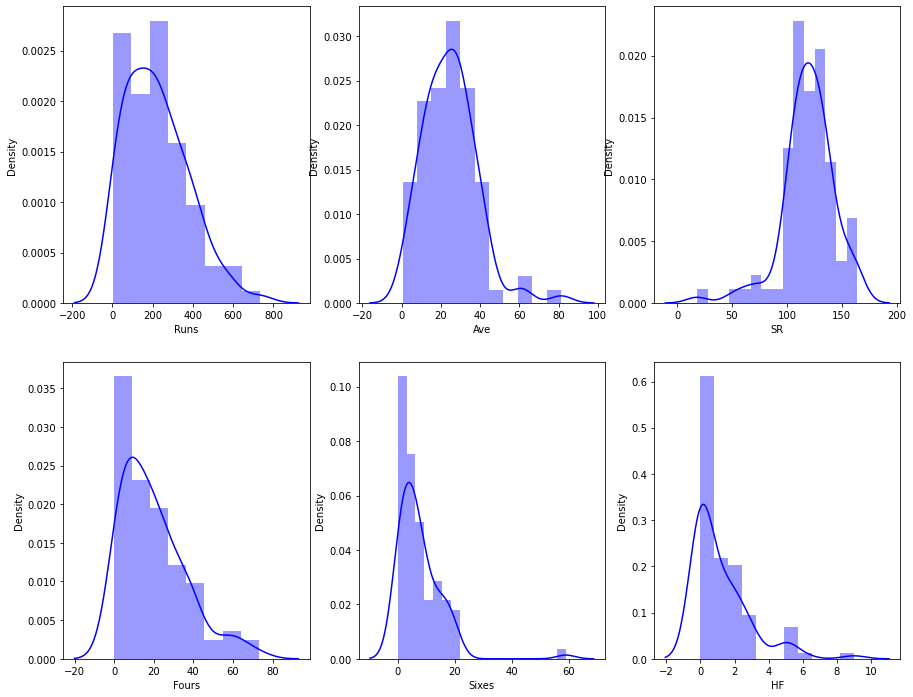

In [406]:
plt.figure(figsize=(15, 12))

col = 1
for i in df.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.distplot(df[i], color = 'b')
    col += 1 

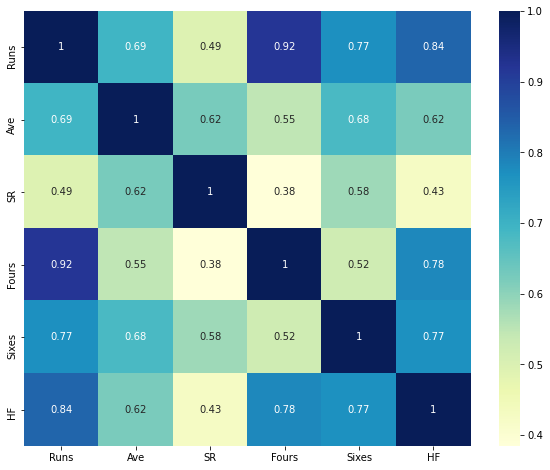

In [408]:
#checking for correlation
plt.figure(figsize=(10,8))
corr=df.drop(columns='Name').corr()
sns.heatmap(corr,annot=True, cmap = 'YlGnBu');

Observations:
  - We can in above graphs, how the players have performed and who are placed in to 10 list of maximum Strike Rate, 4's, 6's, average's etc.
  - From the CORR diagram, its clear to summarize that:
    -there's some relation between number of 4's with Runs. While there's negative relation with Strike rate and 4's.

In [38]:
# we'll scale the data and perform the modelling task now:

df4 = df.iloc[:,1:7] 
df41 = df4.apply(zscore)
df41.head()

Runs       Ave        SR     Fours     Sixes        HF
0  3.301945  2.683984  1.767325  1.607207  6.462679  4.651551
1  2.381639  0.896390  1.036605  2.710928  1.184173  2.865038
2  1.770248  0.610640  1.788154  2.281703  1.435530  2.269533
3  1.667276  1.388883  1.297182  1.300618  1.561209  2.269533
4  2.246490  1.174755  0.444038  2.343021  1.309851  2.269533

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

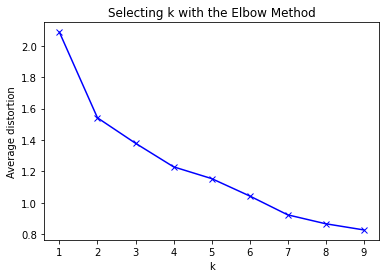

In [39]:
#plotting to check for optimal clustres 


clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df41)
    prediction=model.predict(df41)
    meanDistortions.append(sum(np.min(cdist(df41, model.cluster_centers_, 'euclidean'), axis=1)) / 
                           df41.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [40]:
# The elbow here is 2.
k_means = KMeans(n_clusters = 2)
k_means.fit(df41)
labels = k_means.labels_


In [41]:
# Calculating silhouette_score
silhouette_score(df41,labels)

0.41111085574076756

In [42]:
#merging the predicted value to dataset

df['cluster']=labels
df.head()

Name   Runs    Ave      SR  Fours  Sixes   HF  cluster
0   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0        0
1  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0        0
2   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0        0
3   CL White  479.0  43.54  149.68   41.0   20.0  5.0        0
4   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0        0

In [43]:
df.cluster.value_counts().sort_index()

0    35
1    55
Name: cluster, dtype: int64

In [44]:
df['cluster'] = df['cluster'].replace({1: 'Grade B', 0: 'Grade A'})


Grade_A = df[df['cluster'] == 'Grade A']
Grade_A.head(10)

Name   Runs    Ave      SR  Fours  Sixes   HF  cluster
0        CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0  Grade A
1       G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0  Grade A
2        V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0  Grade A
3        CL White  479.0  43.54  149.68   41.0   20.0  5.0  Grade A
4        S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0  Grade A
5       AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0  Grade A
6    KP Pietersen  305.0  61.00  147.34   22.0   20.0  3.0  Grade A
7       RG Sharma  433.0  30.92  126.60   39.0   18.0  5.0  Grade A
8  AB de Villiers  319.0  39.87  161.11   26.0   15.0  3.0  Grade A
9       JP Duminy  244.0  81.33  128.42   13.0   11.0  2.0  Grade A

In [45]:
Grade_B = df[df['cluster'] == 'Grade B']
Grade_B.head(10)

Name   Runs    Ave      SR  Fours  Sixes   HF  cluster
34       MS Bisla  213.0  30.42  133.12   16.0   10.0  1.0  Grade B
36       BJ Hodge  245.0  30.62  140.00   18.0    9.0  0.0  Grade B
37        NV Ojha  255.0  23.18  113.83   21.0   13.0  1.0  Grade B
38         DB Das  126.0  42.00  135.48    9.0    6.0  0.0  Grade B
39   AC Gilchrist  172.0  34.40  120.27   21.0    4.0  1.0  Grade B
40    BB McCullum  289.0  24.08  102.12   37.0    3.0  1.0  Grade B
41      IK Pathan  176.0  25.14  139.68   14.0    6.0  0.0  Grade B
42  Azhar Mahmood  186.0  23.25  130.98   16.0    8.0  0.0  Grade B
43      MK Pandey  143.0  20.42  127.67   12.0    6.0  1.0  Grade B
44    S Badrinath  196.0  28.00  108.28   23.0    2.0  1.0  Grade B

<AxesSubplot:xlabel='Runs', ylabel='Fours'>

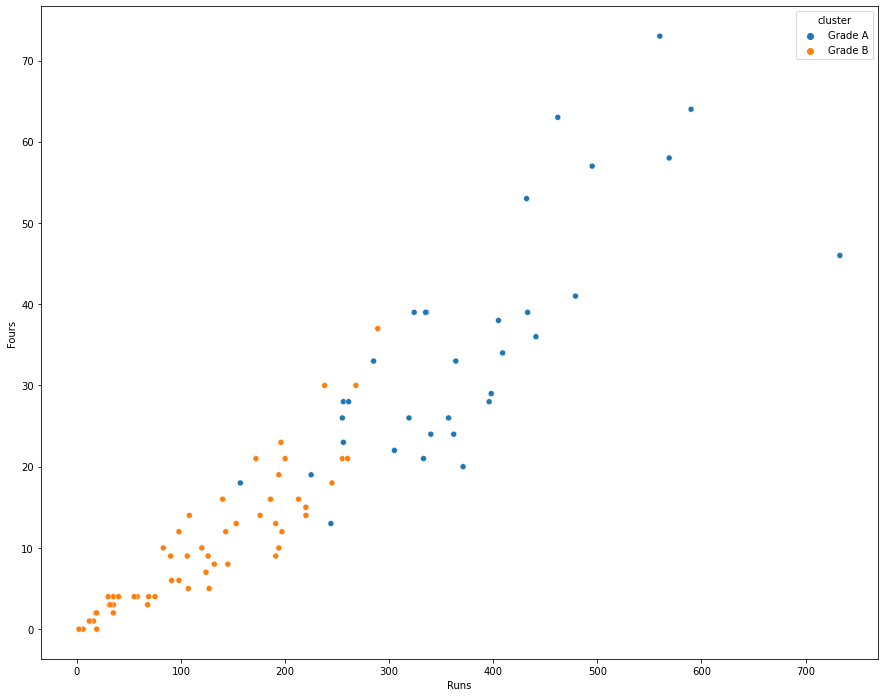

In [46]:
plt.figure(figsize=(15, 12))
sns.scatterplot(x='Runs', y = 'Fours',data = df, hue='cluster')

In [47]:
df.groupby('cluster').mean().T

cluster     Grade A     Grade B
Runs     372.657143  122.745455
Ave       35.962286   17.582000
SR       132.808286  110.481455
Fours     34.685714   10.309091
Sixes     13.771429    3.636364
HF         2.714286    0.218182

Observations:
- We now have divided our dataset into 2 clusters: Grade A and Grade B.
- We have identified the list of players falling in these 2 categories and have seen the distribution of 'RUNS' for these 2 clusters.
- Grade A players performance is much better than Grade B players.
- From last table, we can see the average distribution between Grade A and B players.
    - Avg Run for Grade A - 373 ; while for Grade B - 123.
    - Avg 4's from Grade A player - 34 ; Grade B players have scored 10 4's.
    - Avg 6's from Grade A player - 14 ; Grade B players have scored 4 6's.
    - Strike rate for Grade A player - 132.8 ; while for Grade B players - 110.4
- Grade A players are better performers than the Grade B players --> This can be deduced from our model.

# Part 5:
Questions: [ Total Score: 5 points]
1. List down all possible dimensionality reduction techniques that can be implemented using python.
2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and text data ? Please illustrate your findings using a simple implementation on python.

#### Dimensionality reduction can be classified in 3 parts:

##### Feature selection:

1. Random Forest: 
    - This is one of the most commonly used techniques which tells us the importance of each feature present in the dataset. We can find the importance of each feature and keep the top most features, resulting in dimensionality reduction.

2. Missing Value Ratio: 
    - If the dataset has too many missing values, we use this approach to reduce the number of variables. We can drop the variables having a large number of missing values in them.

3. High Correlation filter: 
    - A pair of variables having high correlation increases multicollinearity in the dataset. So, we can use this technique to find highly correlated features and drop them accordingly.

4. Low Variance filter: 
    - We apply this approach to identify and drop constant variables from the dataset. The target variable is not unduly affected by variables with low variance, and hence these variables can be safely dropped.


##### Components / Factor Based:
1. Principal Component Analysis: 
    - This is one of the most widely used techniques for dealing with linear data. It divides the data into a set of components which try to explain as much variance as possible.

2. Factor Analysis: 
    - This technique is best suited for situations where we have highly correlated set of variables. It divides the variables based on their correlation into different groups, and represents each group with a factor.

3. Independent Component Analysis: 
    - We can use ICA to transform the data into independent components which describe the data using less number of components.

##### Projection Based:
1. ISOMAP: 
    - When the data is strongly non-linear.
2. t-SNE: 
    - Works well when the data is strongly non-linear and also good with Visualization. 
3. UMAP: 
    - For high dimensional data. 

### We'll now see the application of Dimensonlity reduction technique on text data(digit dataset):

In [56]:
# importing the dummy dataset from the std library
from sklearn.datasets import load_digits
df = load_digits()
df.images.shape

(1797, 8, 8)

In [61]:
# the dataset here is the 3 dimesion array with 1797 records with 8x8 grid.

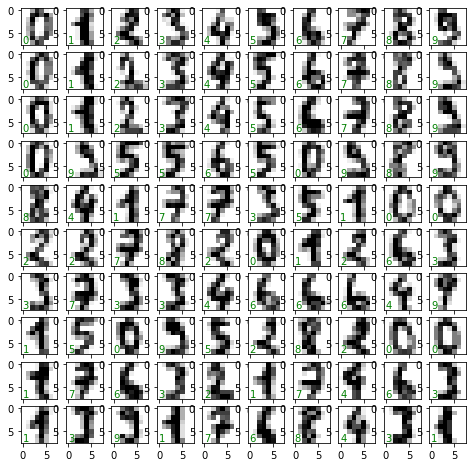

In [64]:
# to view such distribution, we'll use matplotlib - 1st 100 data

import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8))

for i,ax in enumerate(axes.flat):
    ax.imshow(df.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(df.target[i]),
    transform=ax.transAxes, color='green')

In [65]:
# we can see the images populated for the digits: the correct digit value is written in green sub-script.

In [67]:
data = df.data
print(data.shape)

(1797, 64)


In [68]:
target = df.target
print(target.shape)

(1797,)


In [70]:
# we have now divided the dataset into DATA and TARGET variables.
# Data stores the actual data par in 2d array. (1797 rows with 64 features)
# Target holds the resultset for the data.

In [71]:
#transform the data to two dimensions using manifold learning algorithm --> Isomap
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(df.data)
data_projected = iso.transform(df.data)
data_projected.shape

(1797, 2)

In [72]:
# we'll now split the data:
X = data
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

In [73]:
# using NB model:

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [75]:
accuracy_score(y_test, pred)

0.8407407407407408

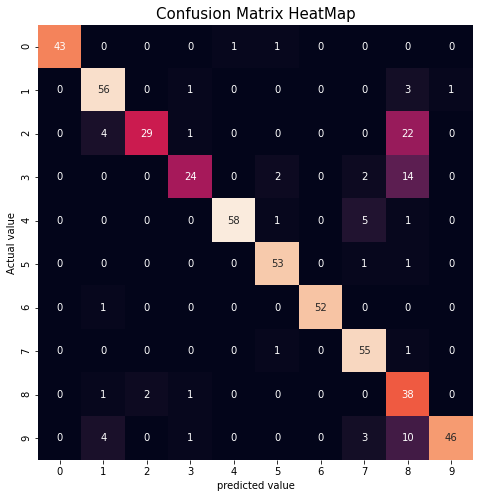

In [76]:
# checking the model's prediction:
plt.figure(figsize = (12, 8))
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('Actual value');
plt.title('Confusion Matrix HeatMap', fontsize = 15);

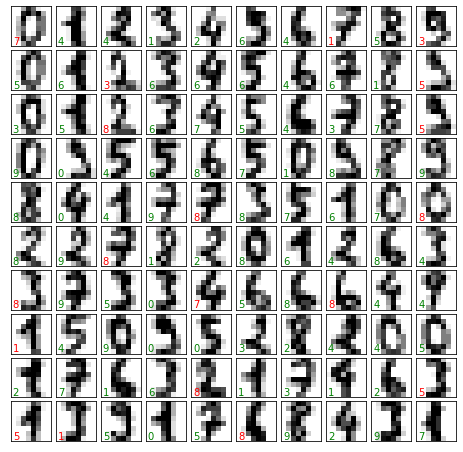

In [77]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(df.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(pred[i]),
    transform=ax.transAxes,
    color='green' if (y_test[i] == pred[i]) else 'red')

Observations:
 - from the Confusion matrix, its clear that the model faced issue while identifying 2-8, 3-8, 9-8.
 - the next graph represents the inputs with the predicted values. When the prediction matches with actual result, the result is made visible in green color, esle red color.